# Probability practice

Part A. Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

Part B. Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?



## Part A

In [70]:
#Expected fraction of random clickers
p_rc=0.3

#Expected fraction of truthful clickers
p_tc=0.7

p_y=0.65

p_n=0.35

p_y_given_rc=0.5
p_n_given_tc=0.5
#Using rule of total probability
#p_y = p(y,tc) + p(y,rc)
#p_y = p(y|tc)*p(tc) + p(y|rc)*p(rc)
#Need to find p(y|tc)

p_y_given_tc = (p_y - (p_y_given_rc*p_rc))/p_tc
p_y_given_tc

0.7142857142857143

## Part B

In [71]:
#given
pos_given_dis=0.993
neg_given_nodis=0.9999
dis=0.000025

no_dis=1-dis
pos_given_nodis=1-neg_given_nodis

#From rule of total probability
pos= (pos_given_dis*dis) + (pos_given_nodis*no_dis)

#From Bayes rule
dis_given_pos = (dis * pos_given_dis)/pos

dis_given_pos

0.19888241302651516

# Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song

song: the title of the song

year: year (1958 to 2021)

week: chart week of that year (1, 2, etc)

week_position: what position that song occupied that week on the Billboard top 100 chart.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('billboard.csv')

df.head()

Unnamed: 0                                                url    week_id  \
0           1  http://www.billboard.com/charts/hot-100/1965-0...  7/17/1965   
1           2  http://www.billboard.com/charts/hot-100/1965-0...  7/24/1965   
2           3  http://www.billboard.com/charts/hot-100/1965-0...  7/31/1965   
3           4  http://www.billboard.com/charts/hot-100/1965-0...   8/7/1965   
4           5  http://www.billboard.com/charts/hot-100/1965-0...  8/14/1965   

   week_position                    song   performer  \
0             34  Don't Just Stand There  Patty Duke   
1             22  Don't Just Stand There  Patty Duke   
2             14  Don't Just Stand There  Patty Duke   
3             10  Don't Just Stand There  Patty Duke   
4              8  Don't Just Stand There  Patty Duke   

                            song_id  instance  previous_week_position  \
0  Don't Just Stand TherePatty Duke         1                    45.0   
1  Don't Just Stand TherePatty Duke         1                    34.0   
2  Don't Just Stand TherePatty Duke         1                    22.0   
3  Don't Just Stand TherePatty Duke         1                    14.0   
4  Don't Just Stand TherePatty Duke         1                    10.0   

   peak_position  weeks_on_chart  year  week  
0             34               4  1965    29  
1             22               5  1965    30  
2             14               6  1965    31  
3             10               7  1965    32  
4              8               8  1965    33

In [73]:
df = df[['performer','song','year','week','week_position']].drop_duplicates()
df[:5]

performer                    song  year  week  week_position
0  Patty Duke  Don't Just Stand There  1965    29             34
1  Patty Duke  Don't Just Stand There  1965    30             22
2  Patty Duke  Don't Just Stand There  1965    31             14
3  Patty Duke  Don't Just Stand There  1965    32             10
4  Patty Duke  Don't Just Stand There  1965    33              8

## Part A

Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [74]:
top_10_songs = df.groupby(['performer','song'])['week'].size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)[:10]

In [75]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'magenta')])]

top_10_songs = top_10_songs.style.set_caption("Top 10 most popular Billboard songs since 1958").set_table_styles(styles)
top_10_songs

## Part B

Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

In [76]:
musical_diversity = df[(df['year']!=1958) & (df['year']!=2021)].sort_index()
musical_diversity= musical_diversity[['song','year']]
count_songs_year=musical_diversity.value_counts().reset_index(name='song_count')

In [77]:
unique_songs_year= count_songs_year[['song','year']].value_counts(subset='year').reset_index()
# unique_songs_year['year']=pd.to_datetime(unique_songs_year['year'])

In [78]:
unique_songs_year=unique_songs_year.sort_values(by='year', ascending=True)

In [79]:
unique_songs_year

year  count
16  1959    641
14  1960    668
6   1961    747
5   1962    748
9   1963    739
..   ...    ...
32  2016    520
25  2017    555
11  2018    694
17  2019    621
2   2020    792

[62 rows x 2 columns]

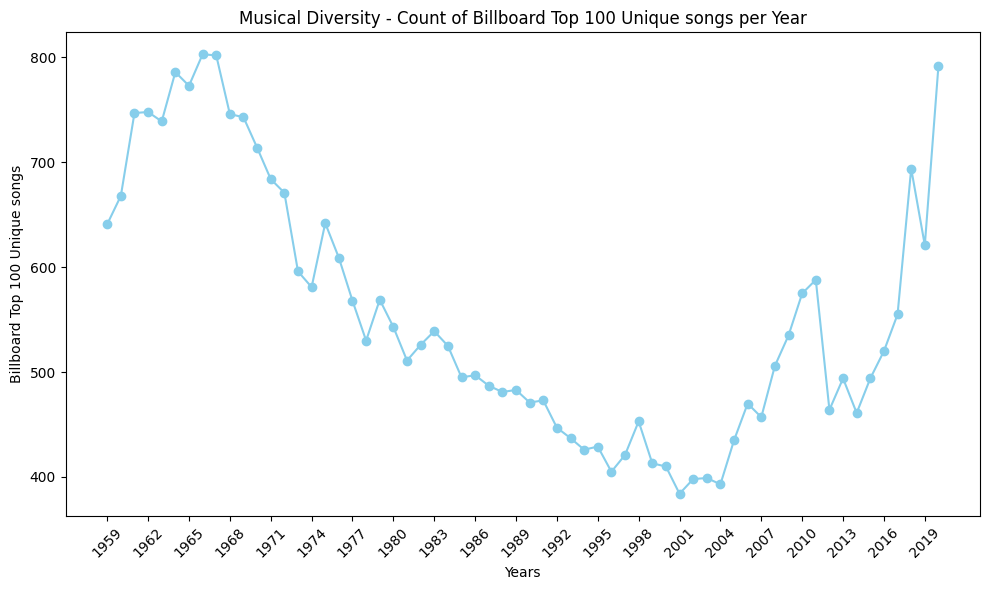

In [80]:

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(unique_songs_year['year'], unique_songs_year['count'], marker='o', color='skyblue', linestyle='-')

# Step 3: Customize the plot (if desired)
plt.xlabel('Years')
plt.ylabel('Billboard Top 100 Unique songs')
plt.title('Musical Diversity - Count of Billboard Top 100 Unique songs per Year')

x_ticks = range(min(unique_songs_year['year']), max(unique_songs_year['year'])+1, 3)  # Adjust the step size as needed

plt.xticks(x_ticks,rotation=45)  # Rotate the x-axis labels for better visibility

# Step 4: Display the plot
plt.tight_layout()  # Ensure all elements fit within the plot area
plt.show()

**Overall, the trend shows that the number of unique Billboard top 100 songs started decreasing from around 1968 to 2001, after which it increased until 2019**

## Part C

Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.

Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.

By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

In [81]:
#If we would group by only week, it is possible that an artist had the same song in the same week one year and the next year. We need to count these as different weeks. Hence concatenating year as well.
df['yearweek']= (df['year'].astype(str)+df['week'].astype(str)).astype(int)

performer_songs=df.groupby(['performer','song'])['yearweek'].count().reset_index()
ten_week_hits=performer_songs[performer_songs['yearweek']>9]

In [82]:
top_artists= ten_week_hits.groupby('performer')['yearweek'].count().reset_index()

In [83]:
top_artists=top_artists[top_artists['yearweek']>=30].rename(columns={'yearweek':'Count of ten week hits'}).sort_values(by='Count of ten week hits',ascending=False).reset_index(drop=True)
top_artists

performer  Count of ten week hits
0              Elton John                      52
1                 Madonna                      44
2           Kenny Chesney                      42
3              Tim McGraw                      39
4             Keith Urban                      36
5           Stevie Wonder                      36
6            Taylor Swift                      35
7         Michael Jackson                      34
8             Rod Stewart                      33
9      The Rolling Stones                      33
10             Billy Joel                      32
11                  Drake                      31
12                Chicago                      31
13          Rascal Flatts                      31
14  Daryl Hall John Oates                      30
15          George Strait                      30
16           Jason Aldean                      30
17           Brad Paisley                      30
18           Neil Diamond                      30

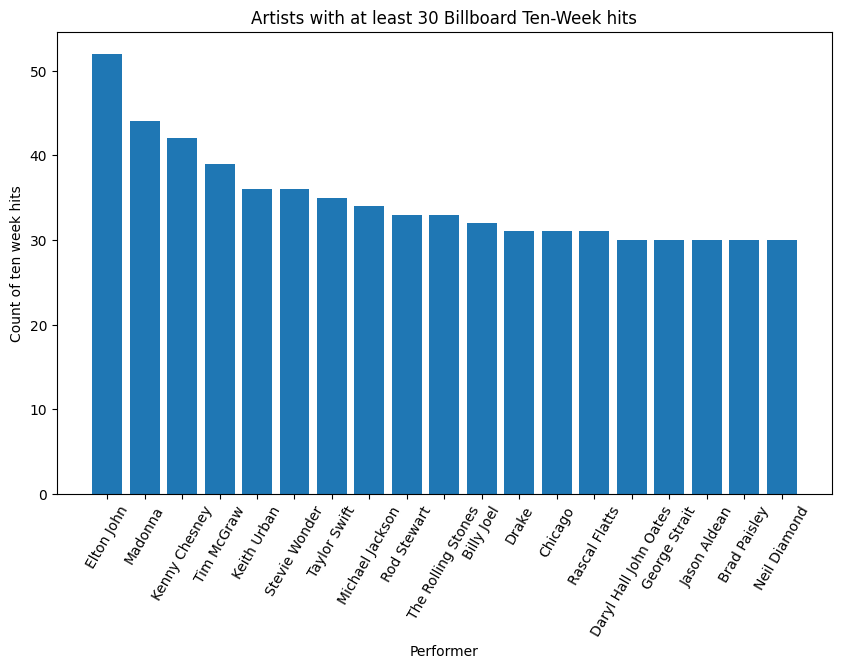

In [84]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(top_artists['performer'], top_artists['Count of ten week hits'])

# Step 3: Customize the plot (if desired)

plt.xlabel('Performer')
plt.ylabel('Count of ten week hits')
plt.title('Artists with at least 30 Billboard Ten-Week hits')
plt.xticks(rotation=60)
plt.show()

# Visual story telling part 1: green buildings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('greenbuildings.csv')

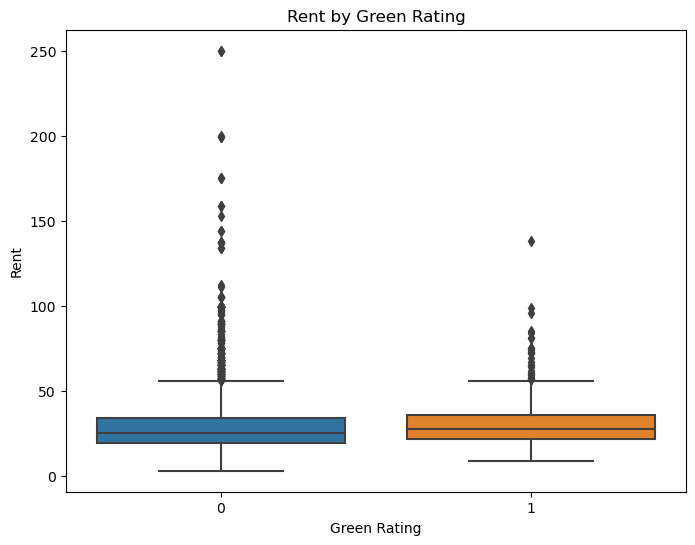

Rent (Median) for green buildings: 27.6
Rent (Median) for non-green buildings: 25.0


In [4]:
data_raw['green_rating'] = data_raw['green_rating'].astype('category')

plt.figure(figsize=(8, 6))
sns.boxplot(x='green_rating', y='Rent', data=data_raw)
plt.xlabel('Green Rating')
plt.ylabel('Rent')
plt.title('Rent by Green Rating')
plt.show()

print("Rent (Median) for green buildings:", data_raw[data_raw['green_rating'] == 1]['Rent'].median())
print("Rent (Median) for non-green buildings:", data_raw[data_raw['green_rating'] == 0]['Rent'].median())

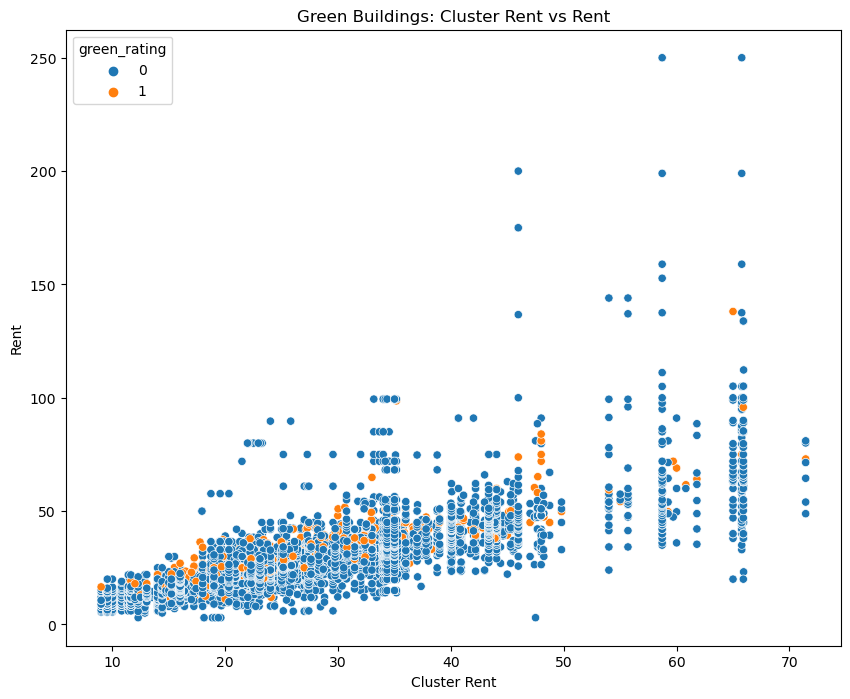

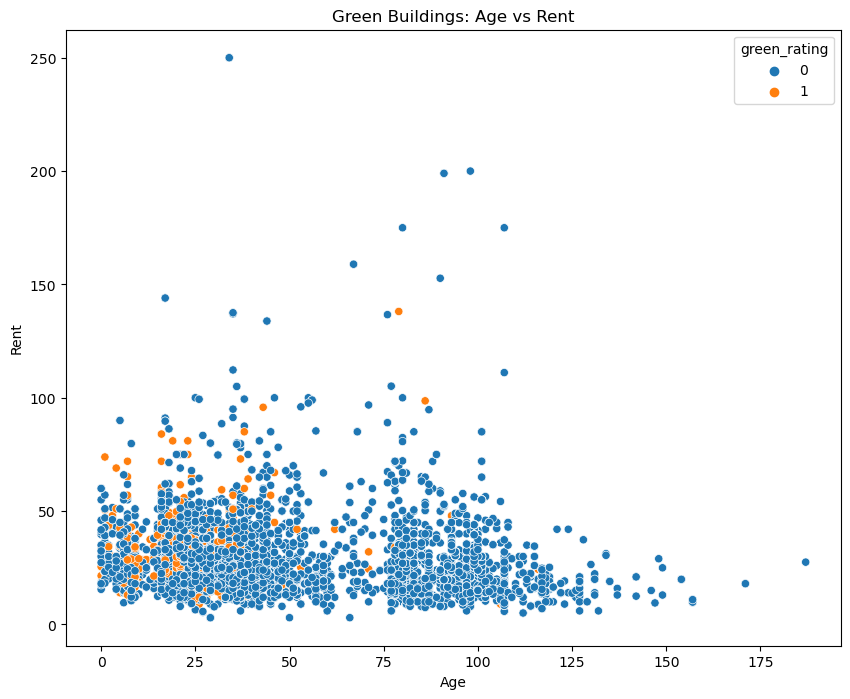

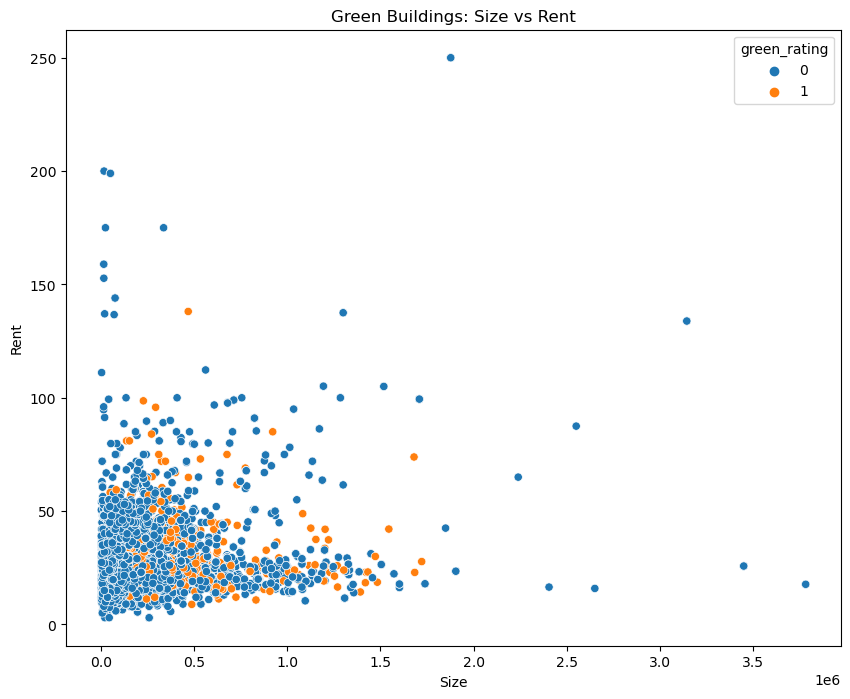

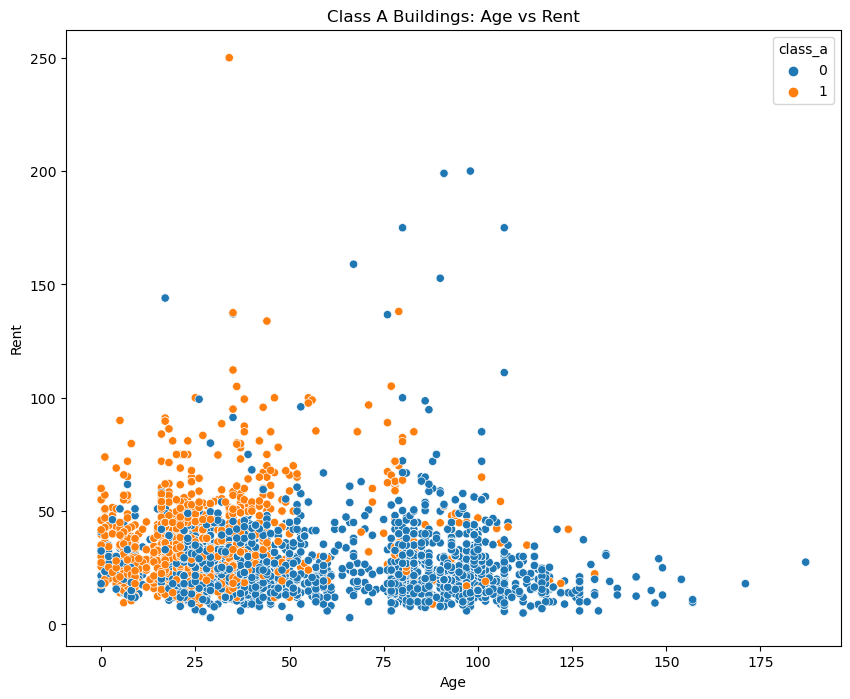

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Green Buildings: Cluster Rent vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Green Buildings: Age vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Green Buildings: Size vs Rent')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='Rent', hue='class_a', data=data_raw)
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Class A Buildings: Age vs Rent')
plt.show()

**Notable Findings:**

1. There exists a correlation between rent and cluster rent.
2. As anticipated, rent demonstrates correlation with property size.
3. A predominant proportion of Class A buildings exhibit relatively youthful ages.
4. The influence of age on rent is not particularly strong.
5. Elevated rental rates for Class A buildings reflect their premium status.

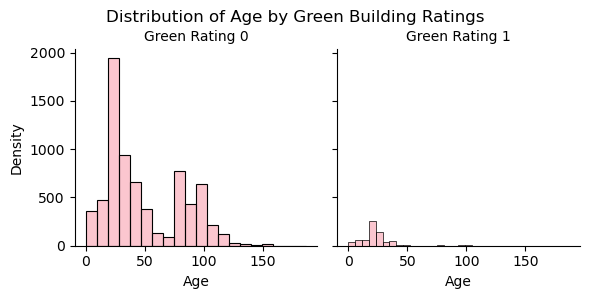

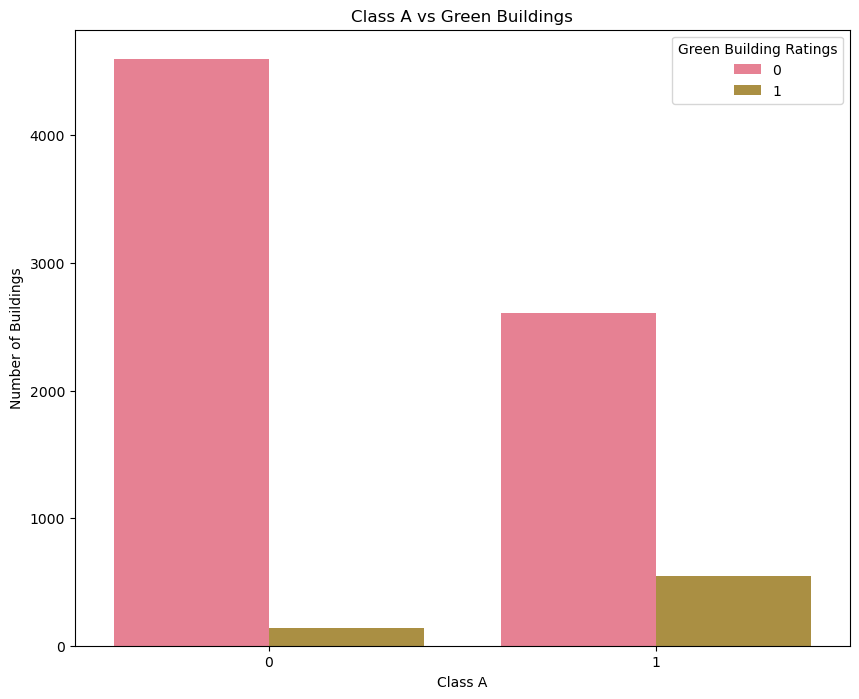

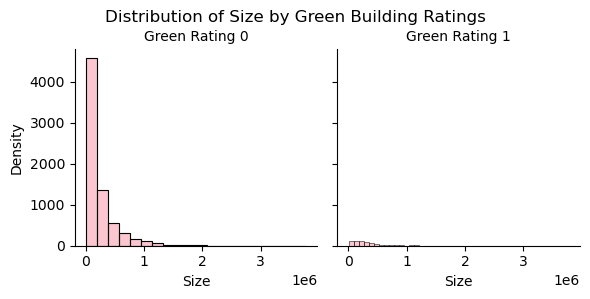

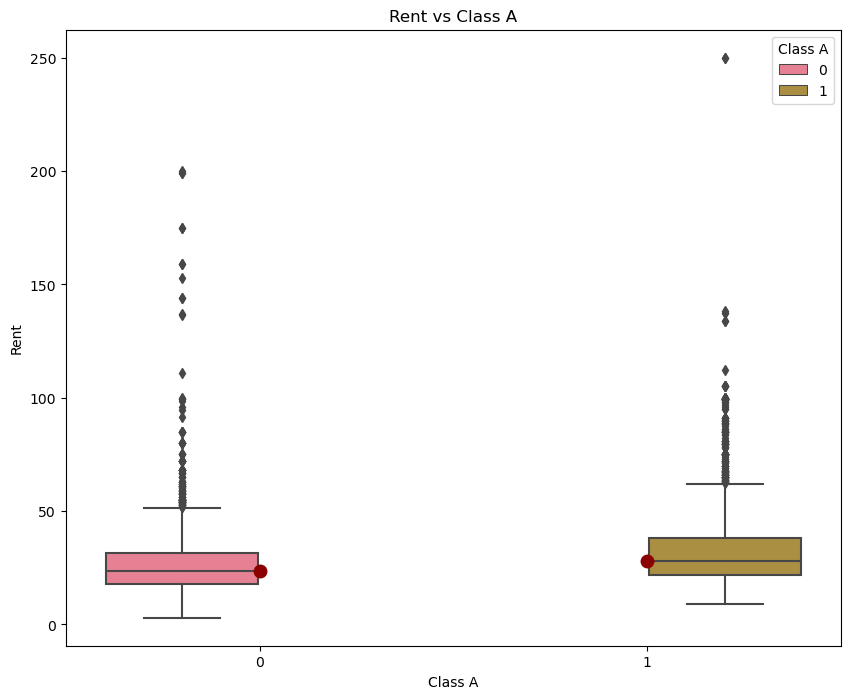

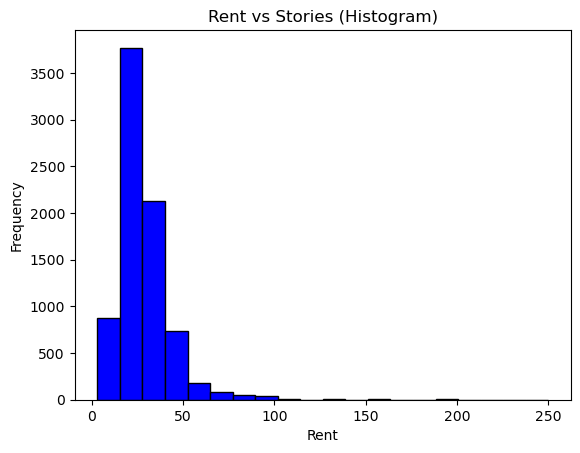

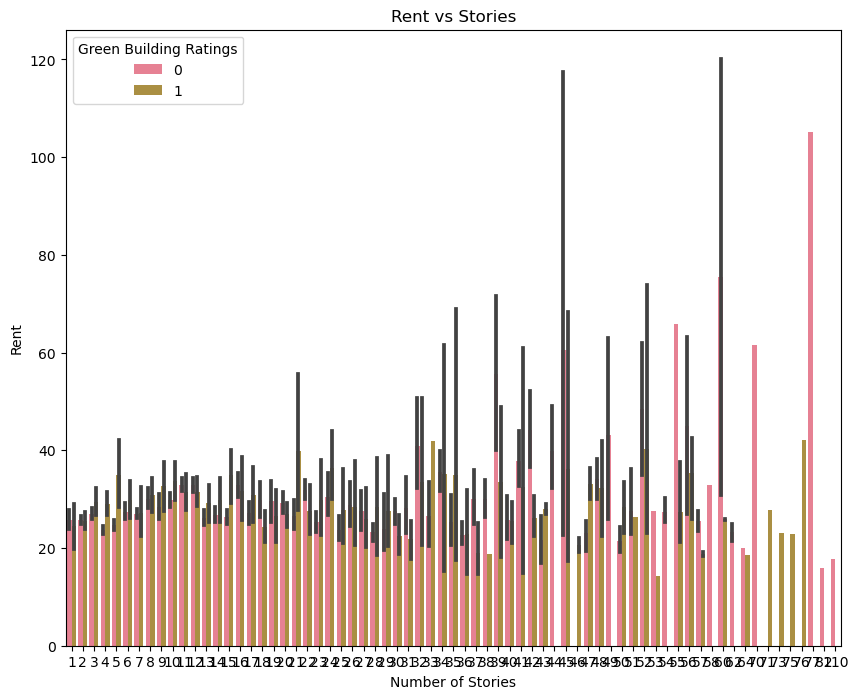

In [6]:
sns.set_palette("husl")
g = sns.FacetGrid(data_raw, col='green_rating')
g.map(sns.histplot, 'age', bins=20, alpha=0.4)
g.set_axis_labels("Age", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Age by Green Building Ratings')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data_raw, x='class_a', hue='green_rating', dodge=True)
plt.xlabel('Class A')
plt.ylabel('Number of Buildings')
plt.title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g = sns.FacetGrid(data_raw, col='green_rating')
g.map(sns.histplot, 'size', bins=20, alpha=0.4)
g.set_axis_labels("Size", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Size by Green Building Ratings')
plt.show()

medians = data_raw.groupby('class_a')['Rent'].median().reset_index()
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_raw, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
plt.xlabel('Class A')
plt.ylabel('Rent')
plt.title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

plt.hist(data_raw[data_raw['Rent'] < 5000]['Rent'].dropna(), bins=20, color='blue', edgecolor='black')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Rent vs Stories (Histogram)')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='stories', y='Rent', hue='green_rating', data=data_raw)
plt.xlabel('Number of Stories')
plt.ylabel('Rent')
plt.title('Rent vs Stories')
plt.legend(title='Green Building Ratings')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_age_density = sns.displot(data_raw, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


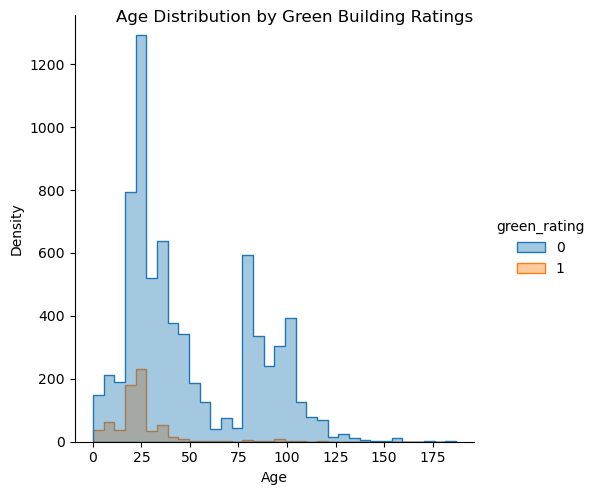

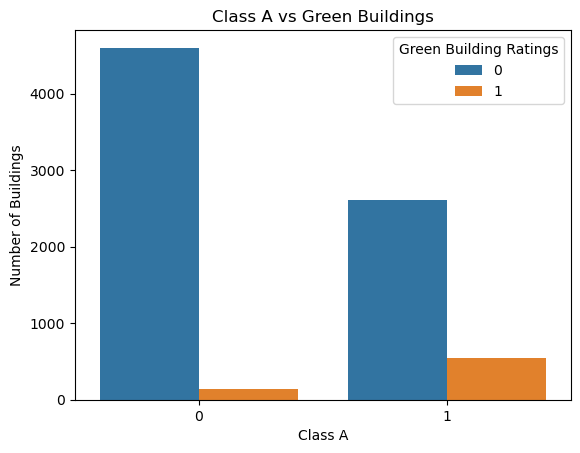

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_size_density = sns.displot(data_raw, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


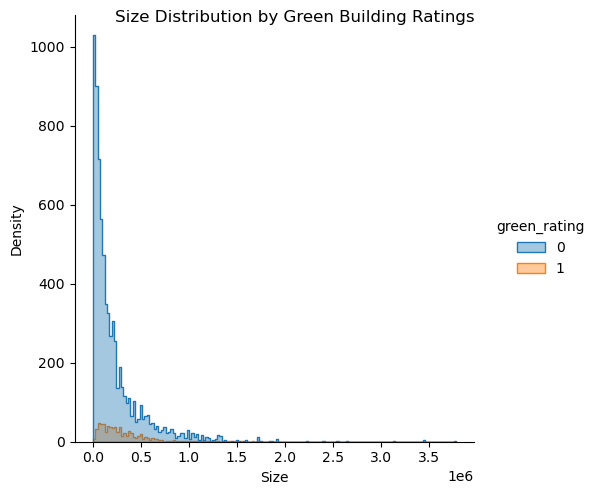

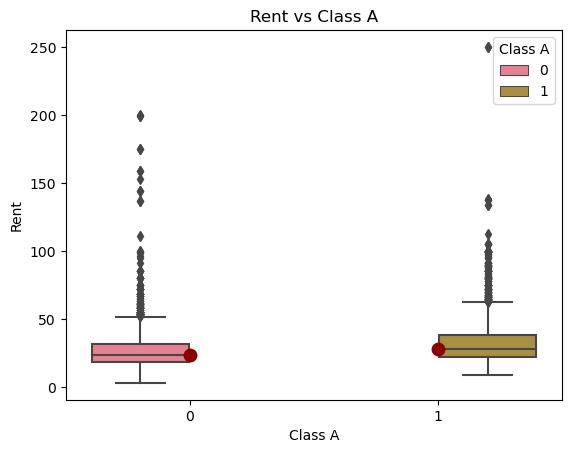

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\1854712626.py:31: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  hist_rent_vs_stories = sns.histplot(data_raw, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


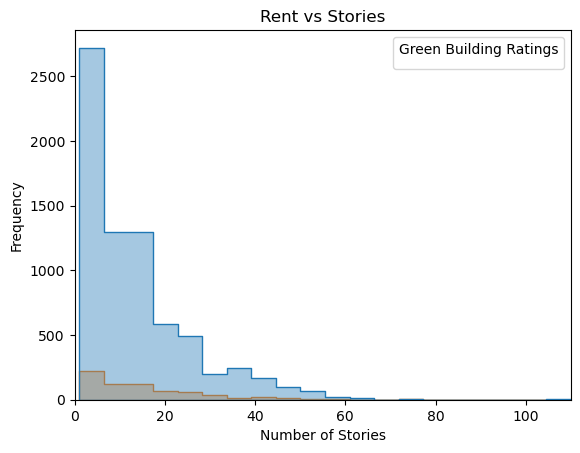

In [7]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

g_age_density = sns.displot(data_raw, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_age_density.set_axis_labels("Age", "Density")
g_age_density.set_titles("Green Building Ratings: {col_name}")
g_age_density.fig.suptitle('Age Distribution by Green Building Ratings')
plt.show()

bar_class_a = sns.countplot(data=data_raw, x='class_a', hue='green_rating', dodge=True, palette=custom_palette)
bar_class_a.set_xlabel('Class A')
bar_class_a.set_ylabel('Number of Buildings')
bar_class_a.set_title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g_size_density = sns.displot(data_raw, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_size_density.set_axis_labels("Size", "Density")
g_size_density.set_titles("Green Building Ratings: {col_name}")
g_size_density.fig.suptitle('Size Distribution by Green Building Ratings')
plt.show()

medians = data_raw.groupby('class_a')['Rent'].median().reset_index()
boxplot_rent_class_a = sns.boxplot(data=data_raw, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
boxplot_rent_class_a.set_xlabel('Class A')
boxplot_rent_class_a.set_ylabel('Rent')
boxplot_rent_class_a.set_title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

hist_rent_vs_stories = sns.histplot(data_raw, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
hist_rent_vs_stories.set_xlabel('Number of Stories')
hist_rent_vs_stories.set_ylabel('Frequency')
hist_rent_vs_stories.set_title('Rent vs Stories')
hist_rent_vs_stories.set_xlim(0, data_raw['stories'].max())
plt.legend(title='Green Building Ratings')
plt.show()

**Key Findings:**

1. Green buildings tend to have a higher proportion of younger structures compared to non-green buildings.
2. The prevalence of Class A buildings is notably greater within the green building category.
3. Building size exhibits a positive correlation with both green and non-green designations.
4. Substantial rent disparities are observable between Class A and non-Class A buildings.

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


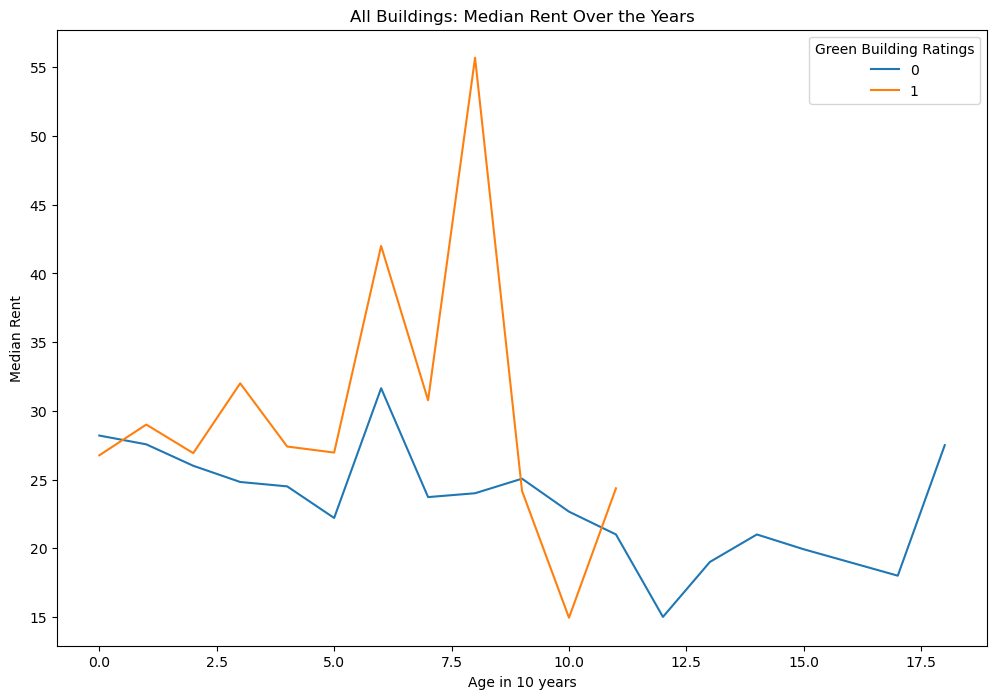

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)


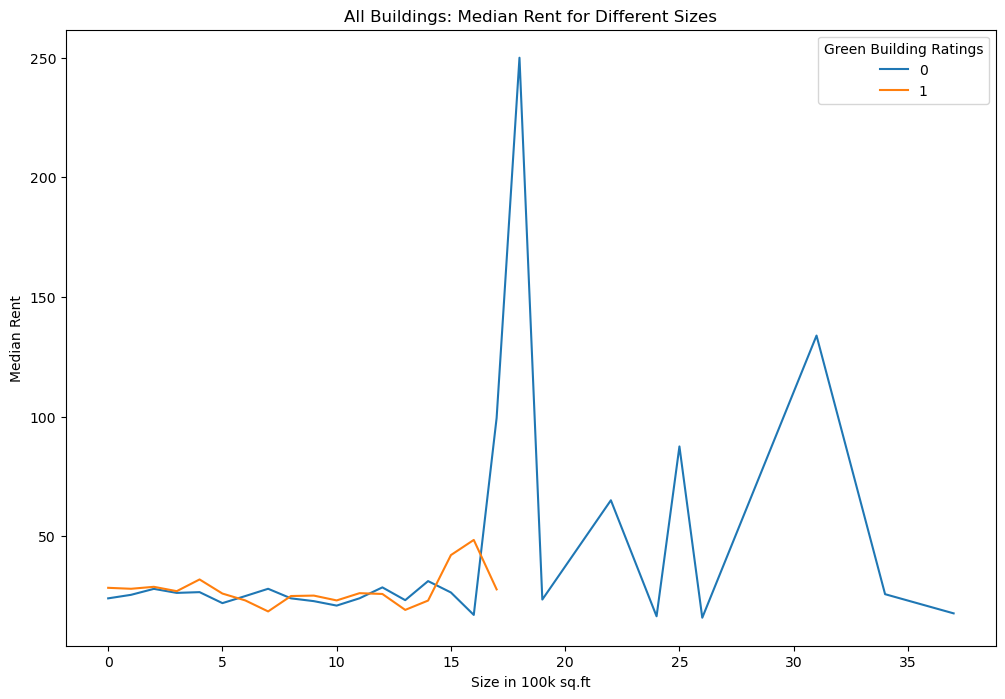

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


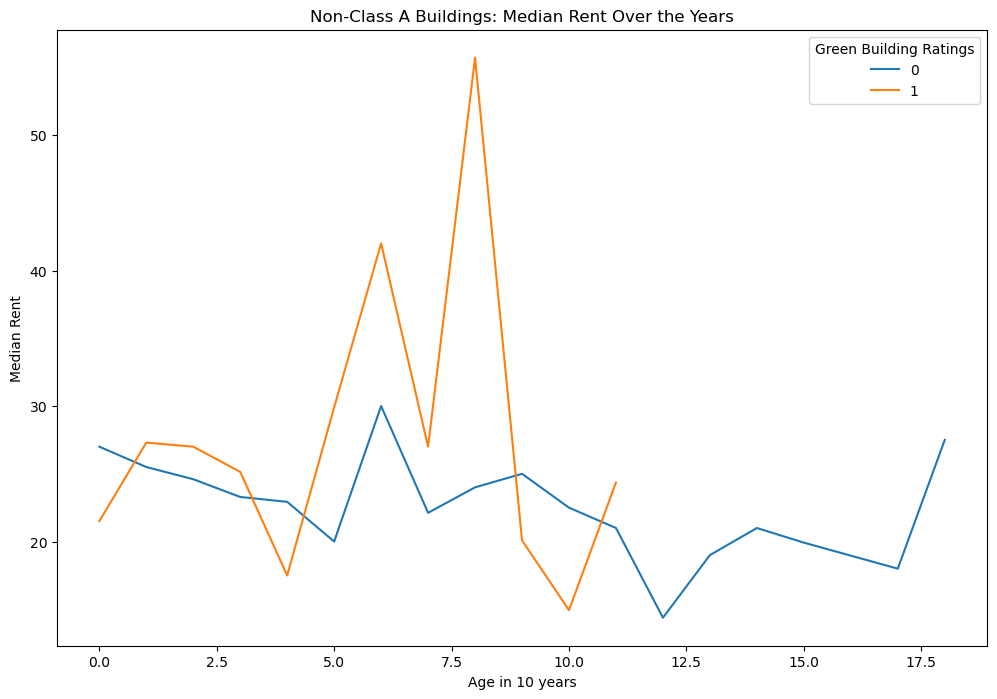

C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_33144\3072876201.py:39: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=medians_size_non_class_a, x='size_cat', y

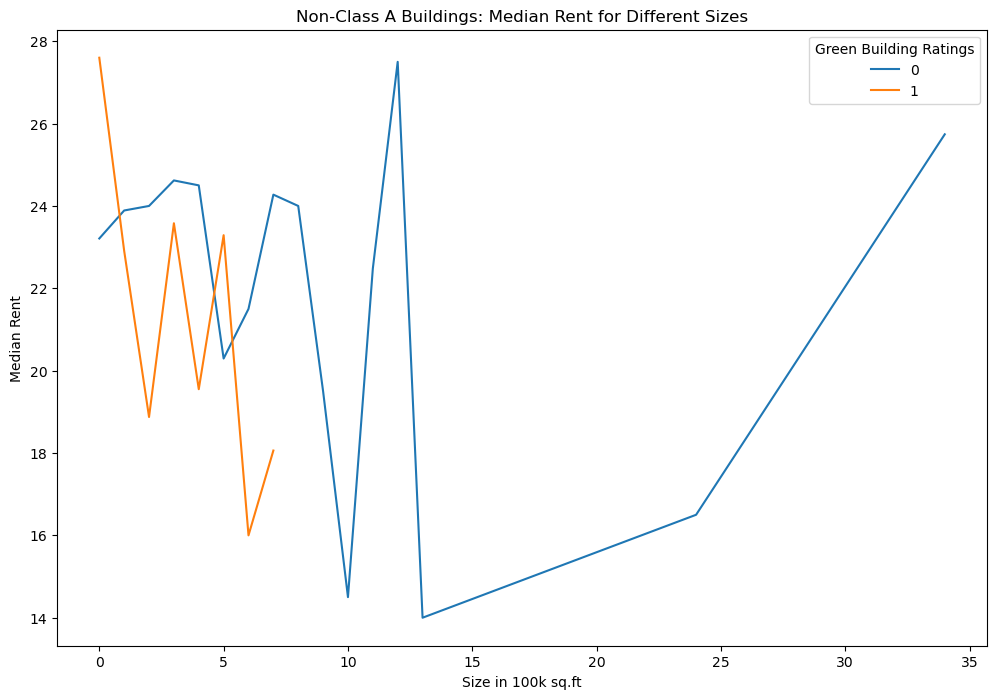

In [8]:
data_raw['age_cat'] = pd.cut(data_raw['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
medians_age = data_raw.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_raw['size_cat'] = pd.cut(data_raw['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
medians_size = data_raw.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a = data_raw[data_raw['class_a'] != 1]
data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
medians_age_non_class_a = data_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
medians_size_non_class_a = data_non_class_a.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=medians_size_non_class_a, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

**Key Insights**

1. Rent values for green buildings are comparatively lower than those for non-green buildings, particularly in the absence of a Class A classification.
2. The variation in rent differences across different sizes and ages underscores the non-uniform nature of these disparities
3. Green buildings with a Class A designation exhibit higher rents compared to non-green buildings at a size of 250,000 sq ft.

In [9]:
data_size_class_a = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000) & (data_raw['class_a'] == 1)]
median_leasing_rate_class_a = data_size_class_a['leasing_rate'].median()

medians_class_a = data_size_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_class_a_green = medians_class_a[medians_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_class_a_non_green = medians_class_a[medians_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_class_a_first_5_years = ((rent_class_a_green.sum() - rent_class_a_non_green.sum()) / 5).round(2)

data_size_non_class_a = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000) & (data_raw['class_a'] != 1)]
medians_non_class_a = data_size_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_non_class_a_green = medians_non_class_a[medians_non_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_non_class_a_non_green = medians_non_class_a[medians_non_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_non_class_a_first_5_years = ((rent_non_class_a_green.sum() - rent_non_class_a_non_green.sum()) / 5).round(2)

msg_leasing_rate = f"Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): ${median_leasing_rate_class_a:.2f}"
msg_diff_rent_class_a = f"Difference in rent for the first 5 years (Class A buildings): ${diff_rent_class_a_first_5_years:.2f}"
msg_diff_rent_non_class_a = f"Difference in rent for the first 5 years (non-Class A buildings): ${diff_rent_non_class_a_first_5_years:.2f}"

print(msg_leasing_rate)
print(msg_diff_rent_class_a)
print(msg_diff_rent_non_class_a)


Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): $91.61
Difference in rent for the first 5 years (Class A buildings): $6.37
Difference in rent for the first 5 years (non-Class A buildings): $-3.46


**Key Observations and Suggestions**

The analysis conducted by the statistics expert appears to have limitations due to overlooking critical variables that influence rental outcomes. Primarily, their approach relies on the median rent across all building types, neglecting crucial factors like building size and classification. As demonstrated, the evaluation should encompass additional aspects, including the building's class. For example, it's evident that Class A buildings, especially when green, yield superior rental returns compared to non-green structures.

In [10]:
occupancy_rate = 0.916
years_to_recover_costs = round(5000000 / (3.097 * 250000 * occupancy_rate), 2)
recovery_msg = f"With the construction of a Class A green building, considering an occupancy rate of {occupancy_rate * 100:.2f}%, it is estimated to recoup expenses in approximately {years_to_recover_costs:.2f} years."
print(recovery_msg)

With the construction of a Class A green building, considering an occupancy rate of 91.60%, it is estimated to recoup expenses in approximately 7.05 years.


**Calculation Considerations**

1. The variation in rent differences across distinct sizes and ages underscores the impracticality of employing a fixed rent difference for return calculations.
2. Consequently, it's advisable to focus solely on buildings with sizes ranging from 200k to 300k sq.ft due to this variability.
3. To accurately reflect the situation, utilizing the median leasing rate for such buildings is more appropriate than an assumed 90% rate.
4. Worth noting is the lack of information pertaining to Class A buildings within the specified size range (200k to 300k sq.ft), prompting the use of the average 5-year return as a basis for conclusive recommendations.

**Conclusive Recommendation**

1. Opting for a green building investment is advisable only for Class-A buildings, given the positive 5-year average returns.
2. Prioritizing the construction of Class-A green buildings is recommended for favorable financial outcomes.
3. Anticipating an occupancy rate of 91.6% adds to the positive outlook.
4. Notably, the average rent difference between green and non-green Class-A buildings (sizes 200k to 300k sq.ft) is 3.097.
5. Consequently, for a 250k sq.ft building with a 91.6% occupancy rate, the anticipated cost recovery period is approximately 7.05 years.

# Visual story telling part 2: Capital Metro data

The file *capmetro_UT.csv* contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

* timestamp: the beginning of the 15-minute window for that row of data
* boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
* alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
* day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
* temperature: temperature at that time in degrees F
* hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
* month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('capmetro_UT.csv')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5824 non-null   object 
 1   boarding     5824 non-null   int64  
 2   alighting    5824 non-null   int64  
 3   day_of_week  5824 non-null   object 
 4   temperature  5824 non-null   float64
 5   hour_of_day  5824 non-null   int64  
 6   month        5824 non-null   object 
 7   weekend      5824 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 364.1+ KB


In [34]:
data.head()

timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   
2  2018-09-01 06:30:00         3          4         Sat        74.82   
3  2018-09-01 06:45:00         3          4         Sat        74.82   
4  2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend  
2            6   Sep  weekend  
3            6   Sep  weekend  
4            7   Sep  weekend

## Figure1: Weekly Ridership Patterns by Hour of Day

<Figure size 864x576 with 0 Axes>

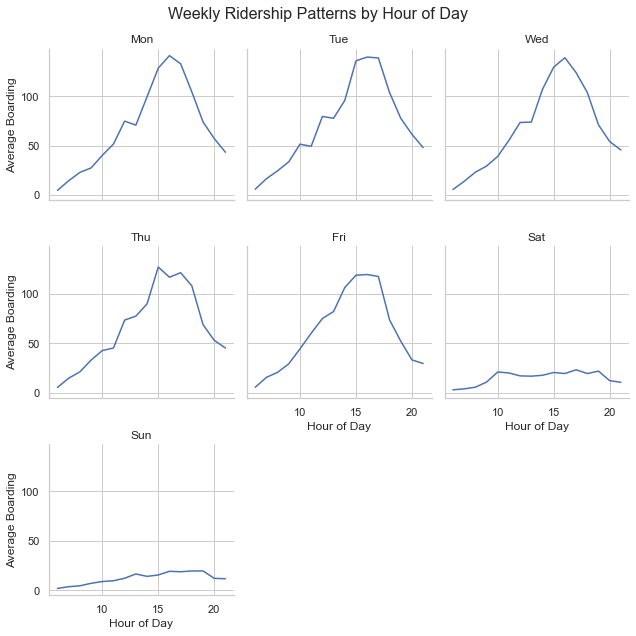

In [13]:
# Weekly Ridership Patterns
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
g = sns.FacetGrid(data, col="day_of_week", col_order=weekdays, col_wrap=3)
g.map(sns.lineplot, "hour_of_day", "boarding", ci=None, palette="tab10")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Hour of Day", "Average Boarding")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Weekly Ridership Patterns by Hour of Day", fontsize=16)
plt.tight_layout()
plt.show()

## Figure2: Weekday vs Weekend ridership comparison

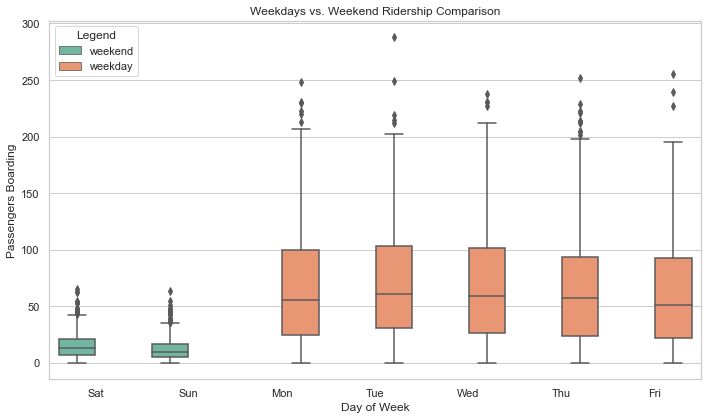

In [19]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.boxplot(data=data, x="day_of_week", y="boarding", hue="weekend", palette="Set2")
plt.title("Weekdays vs. Weekend Ridership Comparison")
plt.xlabel("Day of Week")
plt.ylabel("Passengers Boarding")
plt.legend(title="Legend")
plt.tight_layout()

plt.show()

**This boxplot compares the distribution of ridership between weekdays and weekends. Each box represents the interquartile range (IQR) of passengers boarding the bus for different days of the week. The color differentiation indicates whether the day is a weekend or weekday. It's evident that weekends generally have higher variability in ridership compared to weekdays**

## Figure3: Hourly ridership pattern by month

<Figure size 864x576 with 0 Axes>

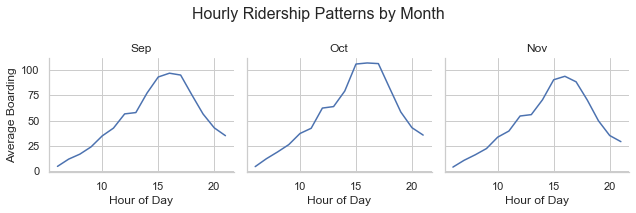

In [20]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(data, col="month", col_wrap=3)
g.map(sns.lineplot, "hour_of_day", "boarding", ci=None)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Hour of Day", "Average Boarding")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Ridership Patterns by Month", fontsize=16)
plt.tight_layout()

plt.show()

**This set of line plots showcases the hourly ridership patterns for each month. Each panel represents a different month, and the x-axis indicates the hour of the day, while the y-axis displays the average number of passengers boarding the bus. The plots reveal how ridership patterns change over the months**

## Figure4: Monthly temperature distribution

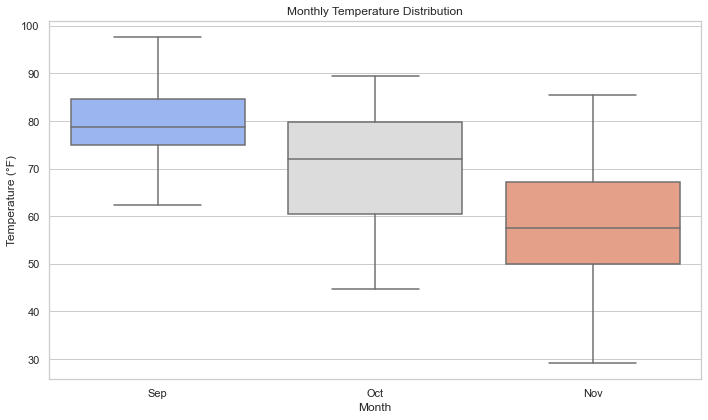

In [21]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.boxplot(data=data, x="month", y="temperature", palette="coolwarm")
plt.title("Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.tight_layout()

plt.show()

**This boxplot displays the distribution of temperature for each month. The boxes represent the IQR of temperature values, providing insight into the temperature variation over the months**

## Figure5: Ridership Variation with Temperature for Each Month

<Figure size 864x576 with 0 Axes>

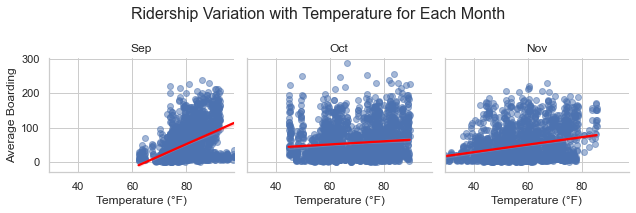

In [25]:
# Create a line plot with regression line for each month
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(data, col="month", col_wrap=3)
g.map(sns.regplot, "temperature", "boarding", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Temperature (°F)", "Average Boarding")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ridership Variation with Temperature for Each Month", fontsize=16)
plt.tight_layout()

plt.show()

## Figure6: Ridership Heatmap by Hour of the Day and Day of the Week

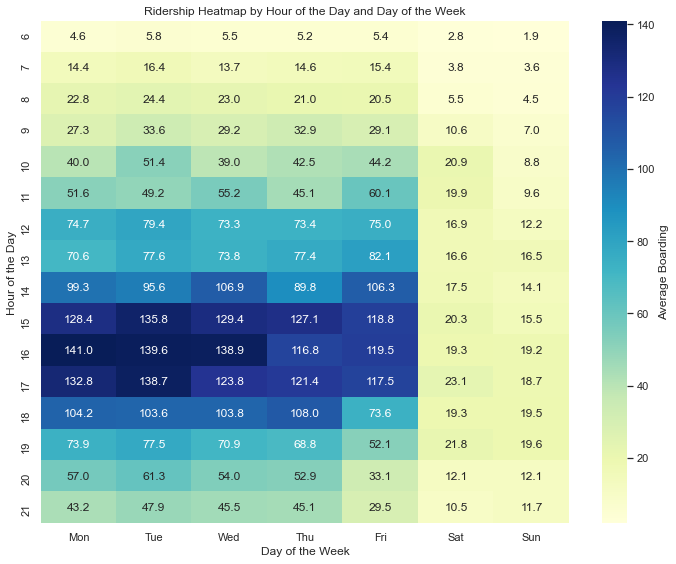

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided dataset
data = pd.read_csv("capmetro_UT.csv", parse_dates=["timestamp"])

# Pivot the data to create a heatmap
heatmap_data = data.pivot_table(index="hour_of_day", columns="day_of_week", values="boarding", aggfunc="mean")

# Reorder the days of the week
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
heatmap_data = heatmap_data.reindex(columns=day_order)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.set_theme()

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Average Boarding'})
plt.title("Ridership Heatmap by Hour of the Day and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.tight_layout()

plt.show()

**This heatmap displays the average ridership patterns by hour of the day and day of the week. The x-axis labels are sorted from Monday to Sunday, and the color intensity represents the average number of passengers boarding the bus during each time slot. The heatmap highlights the variations in ridership based on both the day of the week and the hour of the day.**

## Figure7: Ridership Variation by Temperature and Month

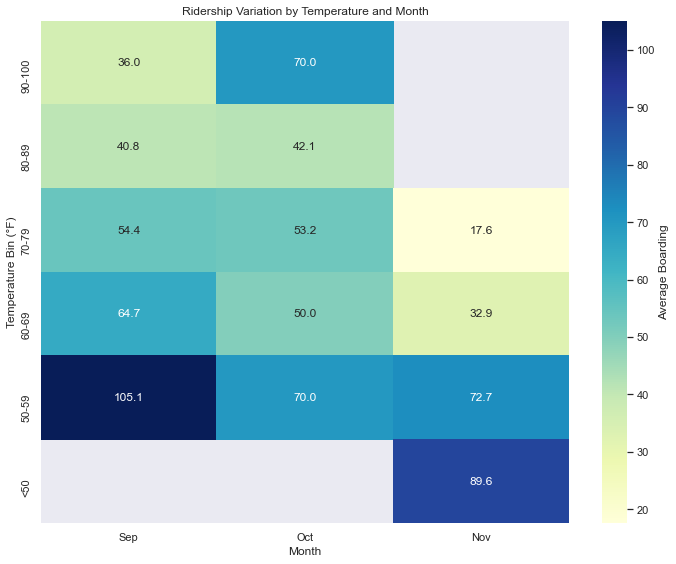

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided dataset
data = pd.read_csv("capmetro_UT.csv", parse_dates=["timestamp"])

# Create temperature bins
temperature_bins = [0, 50, 60, 70, 80, 90, 100]
temperature_labels = ["<50", "50-59", "60-69", "70-79", "80-89", "90-100"]
data['temperature_bin'] = pd.cut(data['temperature'], bins=temperature_bins, labels=temperature_labels, right=False)

# Calculate the average ridership for each combination of temperature bin and month
heatmap_data = data.pivot_table(index="temperature_bin", columns="month", values="boarding", aggfunc="mean")

# Define the desired order for months and temperature bins
month_order = ["Sep", "Oct", "Nov"]
temperature_order = temperature_labels

# Create the heatmap with specified orders
plt.figure(figsize=(10, 8))
sns.set_theme()

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Average Boarding'},
            xticklabels=month_order, yticklabels=temperature_order[::-1])  # Reverse y-axis labels for ascending order
plt.title("Ridership Variation by Temperature and Month")
plt.xlabel("Month")
plt.ylabel("Temperature Bin (°F)")
plt.tight_layout()

plt.show()


**This heatmap displays the variation in average ridership based on temperature bins and months (Sep to Nov). The color intensity indicates the average number of passengers boarding the bus for each combination of temperature bin and month. The heatmap provides a clearer view of the changing ridership patterns associated with different temperature ranges over the specified months**

# Clustering and dimensionality reduction
The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of *vinho verde* wine from northern Portugal. In addition, two other variables about each wine are recorded:

1. whether the wine is red or white
2. the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. 
1. Which dimensionality reduction technique makes the most sense to you for this data? 
2. Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. 
3. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? 

Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
from sklearn.manifold import TSNE

In [2]:
import warnings
# Ignore specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Checking the information about each variable in the dataset
data = pd.read_csv('Wine.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [5]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [6]:
# dropping the labels color and quality from the dataset
df = data.drop(['color', 'quality'], axis=1)

In [7]:
df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

## EDA

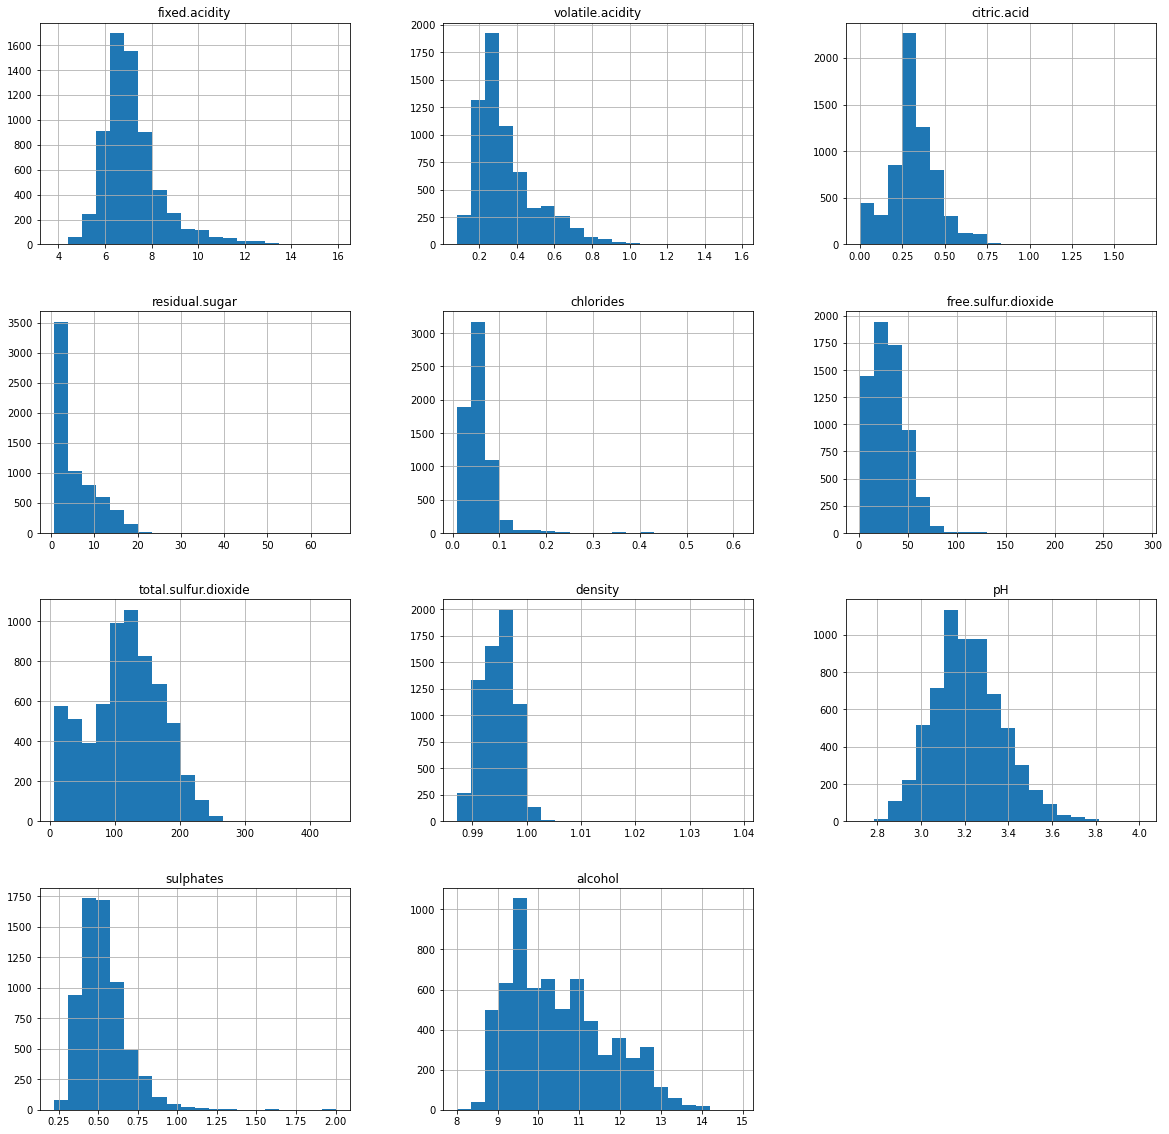

In [8]:
# plotting histograms for the 11 chemical properties in the dataset

df.hist(bins=20, figsize=(20,20))
plt.show()

In [9]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

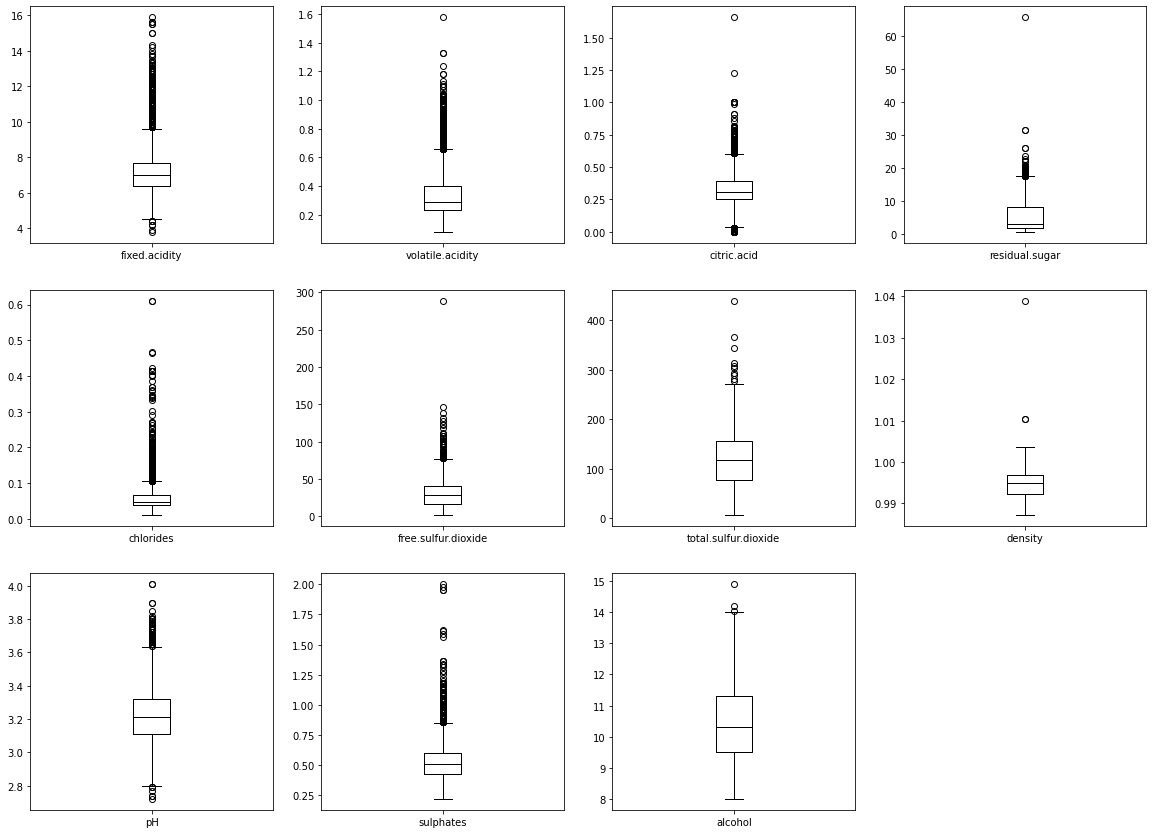

In [10]:
# plotting the box and whisker plot for all variables to detect outliers

df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black', figsize=(20,20))
plt.show()

## Correlation Heat Map

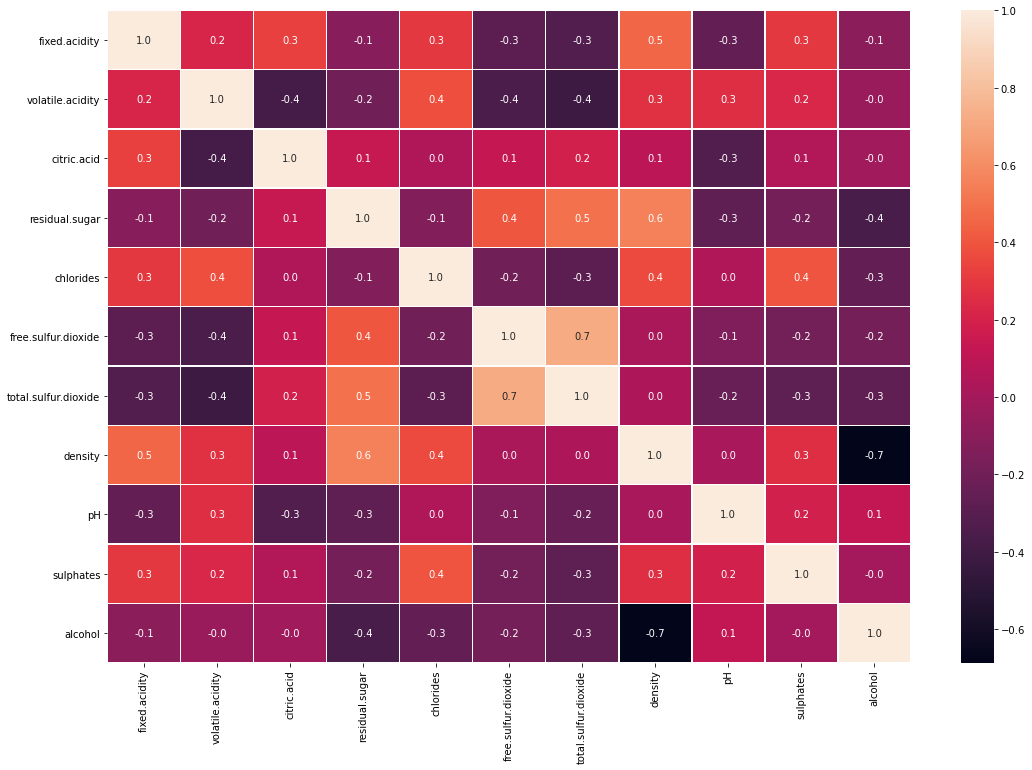

In [11]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Alcohol and density have a moderately strong negative correlation

Whereas, residual sugar and density have a moderately positive correlation

## K-means Clustering

K-means clustering with k=2

In [12]:
model_kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++')

### Data Pre-processing and PCA

In [13]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.decomposition import PCA
# Let's define X and y
y = data['color']
X = df

# Create pipeline with PCA and scaling
pca = PCA(n_components=2)
pipeline_pca = Pipeline([('scaling', preprocessing.StandardScaler()), ('pca', pca)])

# Transform the data
X_PCA_2D = pipeline_pca.fit_transform(X)

### Prediction with PCA

In [14]:
y_pred_pca = model_kmeans.fit_predict(X_PCA_2D)
y_pred_pca.shape

(6497,)

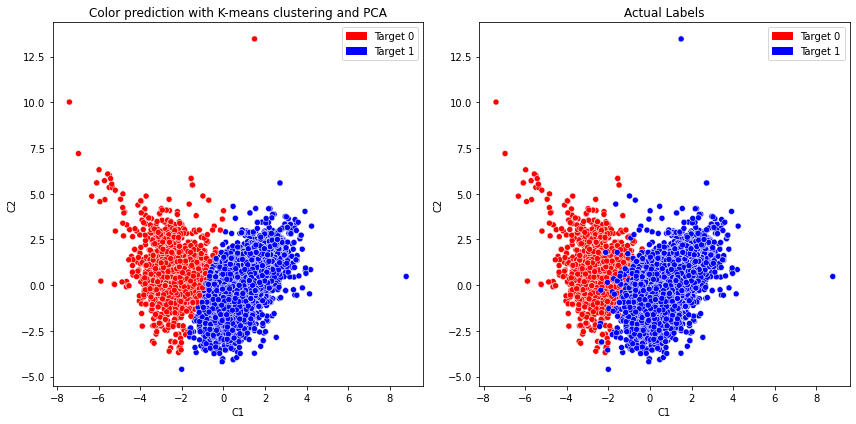

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Color for each target
color_d = {0: 'red', 1: 'blue'}
y_series = pd.Series(y_pred_pca)
c = y_series.map(color_d) 

# Axis and labels
c1 = X_PCA_2D.T[0]
c2 = X_PCA_2D.T[1]
plt.figure(figsize=(12, 6))

# Create figure
plt.subplot(1, 2, 1)
sns.scatterplot(x=c1, y=c2, c=c)
plt.xlabel("C1")
plt.ylabel("C2")

# and legend
handles = [mpatches.Patch(color=v, label="Target {}".format(k)) for k,v in color_d.items()]
plt.legend(handles=handles)
plt.title('Color prediction with K-means clustering and PCA')

# Color mapping for actual labels
color_df = {'red':'red', 'white':'blue'}
color_actual = data.color.map(color_df)

# Create the second scatter plot with actual labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=c1, y=c2, c=color_actual)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("Actual Labels")

# Create a legend for the second plot
handles_actual = [mpatches.Patch(color=v, label="Target {}".format(k)) for k, v in color_d.items()]
plt.legend(handles=handles_actual)

plt.tight_layout()
plt.show()

### Prediction with TSNE

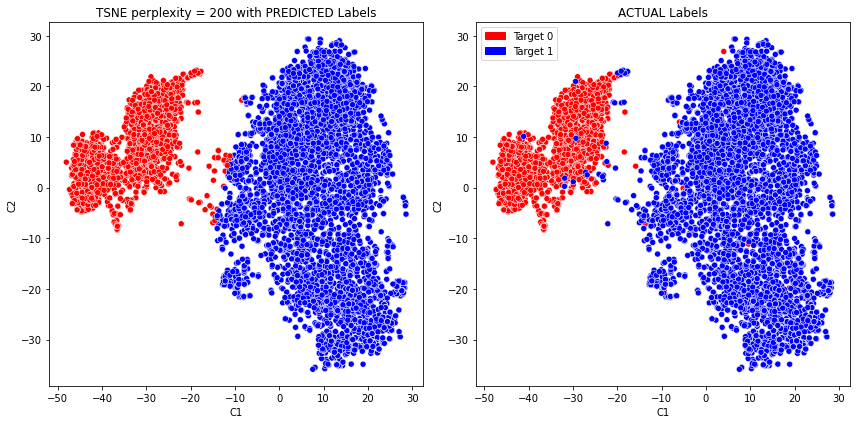

In [16]:
from sklearn.manifold import TSNE
    
# Scaling and TSNE
tsne = TSNE(n_components=2, perplexity=200)
pipeline_tsne = Pipeline([('scaling', preprocessing.StandardScaler()), ('tsne', tsne)])

X_TSNE_2D = pipeline_tsne.fit_transform(X)

y_pred_tsne = model_kmeans.fit_predict(X_TSNE_2D)
y_series_tsne = pd.Series(y_pred_tsne)

color_d = {0: 'red', 1: 'blue'}
c = y_series_tsne.map(color_d) # Color for each target

# Create axis
c1 = X_TSNE_2D.T[0]
c2 = X_TSNE_2D.T[1]
# Create figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with predicted labels
sns.scatterplot(x=c1, y=c2, c=c, ax=axs[0])    
axs[0].set_xlabel("C1")
axs[0].set_ylabel("C2")
axs[0].set_title("TSNE perplexity = 200 with PREDICTED Labels")
    
# Create a legend
handles = [mpatches.Patch(color=v, label="Target {}".format(k)) for k,v in color_d.items()]
plt.legend(handles=handles)


# Scatter plot with actual labels
color_df = {'red':'red', 'white':'blue'}
color_actual = data.color.map(color_df)
sns.scatterplot(x=c1, y=c2, c=color_actual, ax=axs[1])
axs[1].set_xlabel("C1")
axs[1].set_ylabel("C2")
axs[1].set_title("ACTUAL Labels")

# Create a legend for actual labels
handles_actual = [mpatches.Patch(color=v, label="Target {}".format(k)) for k, v in color_d.items()]
axs[1].legend(handles=handles_actual)

plt.tight_layout()
plt.show()

<font size="4"> **For the provided dataset, TSNE dimensionality reduction technique works the best as visible from the graph of predicted versus the actual labels. With the reduced dimensions the model could almost with most certainity explain the variation in the data.**

**With TSNE reduced dimensions the K-means clustering model could easily distinguish between the red and white (blue in graph) wines with a very few misclassification points when compared to the actual label**</font>

### Predicting Quality

In [17]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [18]:
def qlty(s:int):
    if s>5: return 'higher'
    return 'lower'

In [19]:
q = data.quality.map(qlty) # for quality rating 5 categorising higher else lower
q

0        lower
1        lower
2        lower
3       higher
4        lower
         ...  
6492    higher
6493     lower
6494    higher
6495    higher
6496    higher
Name: quality, Length: 6497, dtype: object

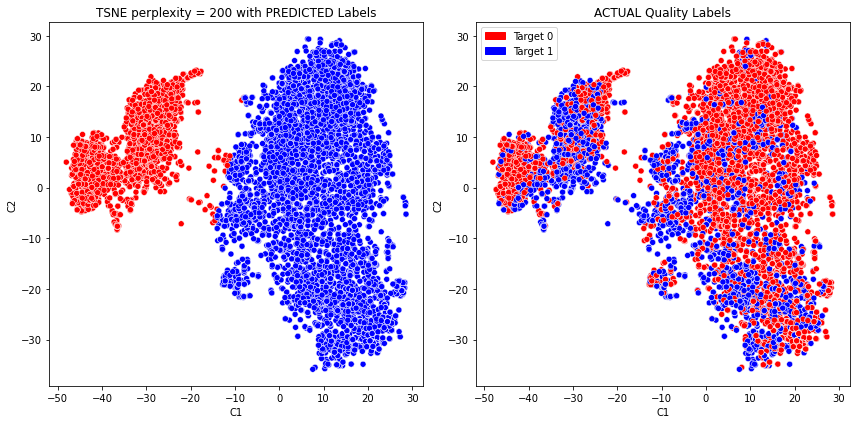

In [20]:
# Create figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with predicted labels
sns.scatterplot(x=c1, y=c2, c=c, ax=axs[0])    
axs[0].set_xlabel("C1")
axs[0].set_ylabel("C2")
axs[0].set_title("TSNE perplexity = 200 with PREDICTED Labels")
    
# Create a legend
handles = [mpatches.Patch(color=v, label="Target {}".format(k)) for k,v in color_d.items()]
plt.legend(handles=handles)

# Scatter plot with qulaity labels
color_df = {'higher':'red', 'lower':'blue'}
color_quality = q.map(color_df)
sns.scatterplot(x=c1, y=c2, c=color_quality, ax=axs[1])
axs[1].set_xlabel("C1")
axs[1].set_ylabel("C2")
axs[1].set_title("ACTUAL Quality Labels")

# Create a legend for actual labels
handles_actual = [mpatches.Patch(color=v, label="Target {}".format(k)) for k, v in color_d.items()]
axs[1].legend(handles=handles_actual)

plt.tight_layout()
plt.show()

<font size=4> **It seems predicting the quality of wine is much more complex. The model is not able to clearly distinguish between high and low quality wine as defined for the dataset with the reduced dimensions. The model may require more number of variables to explain the variability in the quality of wine.**</font>

# Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('social_marketing.csv')
df.rename(columns={'Unnamed: 0':'user'}, inplace=True)
df.head()

user  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 37 columns]

In [113]:
df.shape

(7882, 37)

In [114]:
df.columns

Index(['user', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [115]:
#Dropping the columns of chatter and uncategorized as they do not explain any useful user characteristics
df.drop(columns=['uncategorized'], axis=1, inplace=True)
df.drop(columns=['chatter'], axis=1, inplace=True)
df.head()

user  current_events  travel  photo_sharing  tv_film  sports_fandom  \
0  hmjoe4g3k               0       2              2        1              1   
1  clk1m5w8s               3       2              1        1              4   
2  jcsovtak3               3       4              3        5              0   
3  3oeb4hiln               5       2              2        1              0   
4  fd75x1vgk               2       0              6        0              0   

   politics  food  family  home_and_garden  ...  religion  beauty  parenting  \
0         0     4       1                2  ...         1       0          1   
1         1     2       2                1  ...         0       0          0   
2         2     1       1                1  ...         0       1          0   
3         1     0       1                0  ...         0       1          0   
4         2     0       1                0  ...         0       0          0   

   dating  school  personal_fitness  fashion  small_business  spam  adult  
0       1       0                11        0               0     0      0  
1       1       4                 0        0               0     0      0  
2       1       0                 0        1               0     0      0  
3       0       0                 0        0               0     0      0  
4       0       0                 0        0               1     0      0  

[5 rows x 35 columns]

In [116]:
numeric_df = df.drop(columns=['user'])

# Get the column name with the maximum value for each row
df['topic'] = numeric_df.idxmax(axis=1)

df.head()

user  current_events  travel  photo_sharing  tv_film  sports_fandom  \
0  hmjoe4g3k               0       2              2        1              1   
1  clk1m5w8s               3       2              1        1              4   
2  jcsovtak3               3       4              3        5              0   
3  3oeb4hiln               5       2              2        1              0   
4  fd75x1vgk               2       0              6        0              0   

   politics  food  family  home_and_garden  ...  beauty  parenting  dating  \
0         0     4       1                2  ...       0          1       1   
1         1     2       2                1  ...       0          0       1   
2         2     1       1                1  ...       1          0       1   
3         1     0       1                0  ...       1          0       0   
4         2     0       1                0  ...       0          0       0   

   school  personal_fitness  fashion  small_business  spam  adult  \
0       0                11        0               0     0      0   
1       4                 0        0               0     0      0   
2       0                 0        1               0     0      0   
3       0                 0        0               0     0      0   
4       0                 0        0               1     0      0   

              topic  
0  health_nutrition  
1     sports_fandom  
2               art  
3    current_events  
4     photo_sharing  

[5 rows x 36 columns]

In [117]:
#Checking if there is any user who has 0 interests along all the column

features_df= df.drop(columns=['user','topic'],axis=1)
features_df.loc[(df==0).all(axis=1)]

Empty DataFrame
Columns: [current_events, travel, photo_sharing, tv_film, sports_fandom, politics, food, family, home_and_garden, music, news, online_gaming, shopping, health_nutrition, college_uni, sports_playing, cooking, eco, computers, business, outdoors, crafts, automotive, art, religion, beauty, parenting, dating, school, personal_fitness, fashion, small_business, spam, adult]
Index: []

[0 rows x 34 columns]

In [118]:
# from sklearn.preprocessing import StandardScaler

# features_df = StandardScaler().fit_transform(features_df)

In [119]:
features_df.shape

(7882, 34)

In [120]:
from sklearn.decomposition import PCA
pca= PCA(n_components=25, random_state=41)
pcs= pca.fit_transform(features_df)


In [121]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21172621 0.12721821 0.11375974 0.10789941 0.08119978 0.05432407
 0.03571758 0.03207291 0.02642297 0.02575586 0.01628785 0.01468004
 0.01299357 0.01257594 0.01185802 0.01157341 0.01001751 0.00925603
 0.00899377 0.00760737 0.00735095 0.00695426 0.00649748 0.00636052
 0.00600939]


([<matplotlib.axis.XTick at 0x244807a66d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

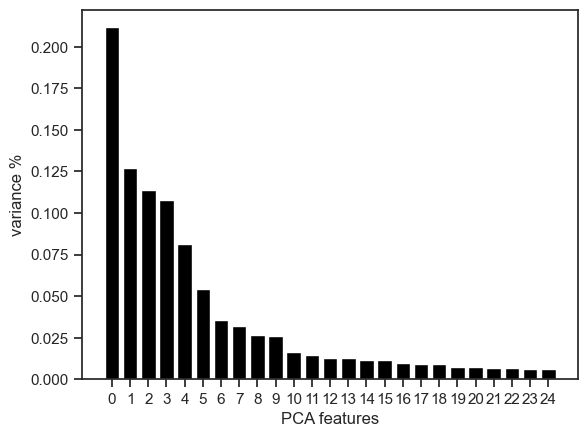

In [122]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [123]:
# Looks like PC1 to PC5 explain most of the variablility, lets calculate how much
print(pca.explained_variance_ratio_[:6].sum())
# It's ~70%, lets add some more so that we can explain around 85%

print(pca.explained_variance_ratio_[:13].sum())

# Let's choose PC1 through PC12

# Save components to a DataFrame
PCA_components = pd.DataFrame(pcs)
PCA_components=PCA_components.iloc[:, : 13]

PCA_components.head()

0.6961274120323552
0.8600581886789138


0         1         2         3         4         5         6   \
0  16.729841 -5.781710  0.523307  0.961419 -0.008719 -0.466897 -1.386748   
1  -3.712423 -2.065565  0.487579 -0.675072  2.438064 -0.722874 -0.912538   
2  -2.645891  0.883975  0.430362 -1.958603 -1.852047  0.426422 -4.556198   
3  -3.898102 -2.021506 -0.631202 -0.446807 -1.582846  0.000415 -1.583068   
4  -3.073525  1.443748 -2.195319  1.911200 -2.589459  3.171191  0.679500   

         7         8         9         10        11        12  
0 -1.021879 -0.738603 -0.246552 -0.253302 -0.124009 -2.293447  
1 -0.448891  0.080321  0.927861 -0.101082 -0.236804 -0.020191  
2  6.911040  0.001432  0.066115 -2.948320  0.760267  0.138848  
3  1.062764 -0.432591 -0.182892 -0.471521 -0.305435 -0.583292  
4 -1.600738 -0.725984 -0.365785 -0.229463 -0.812791  0.190078

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



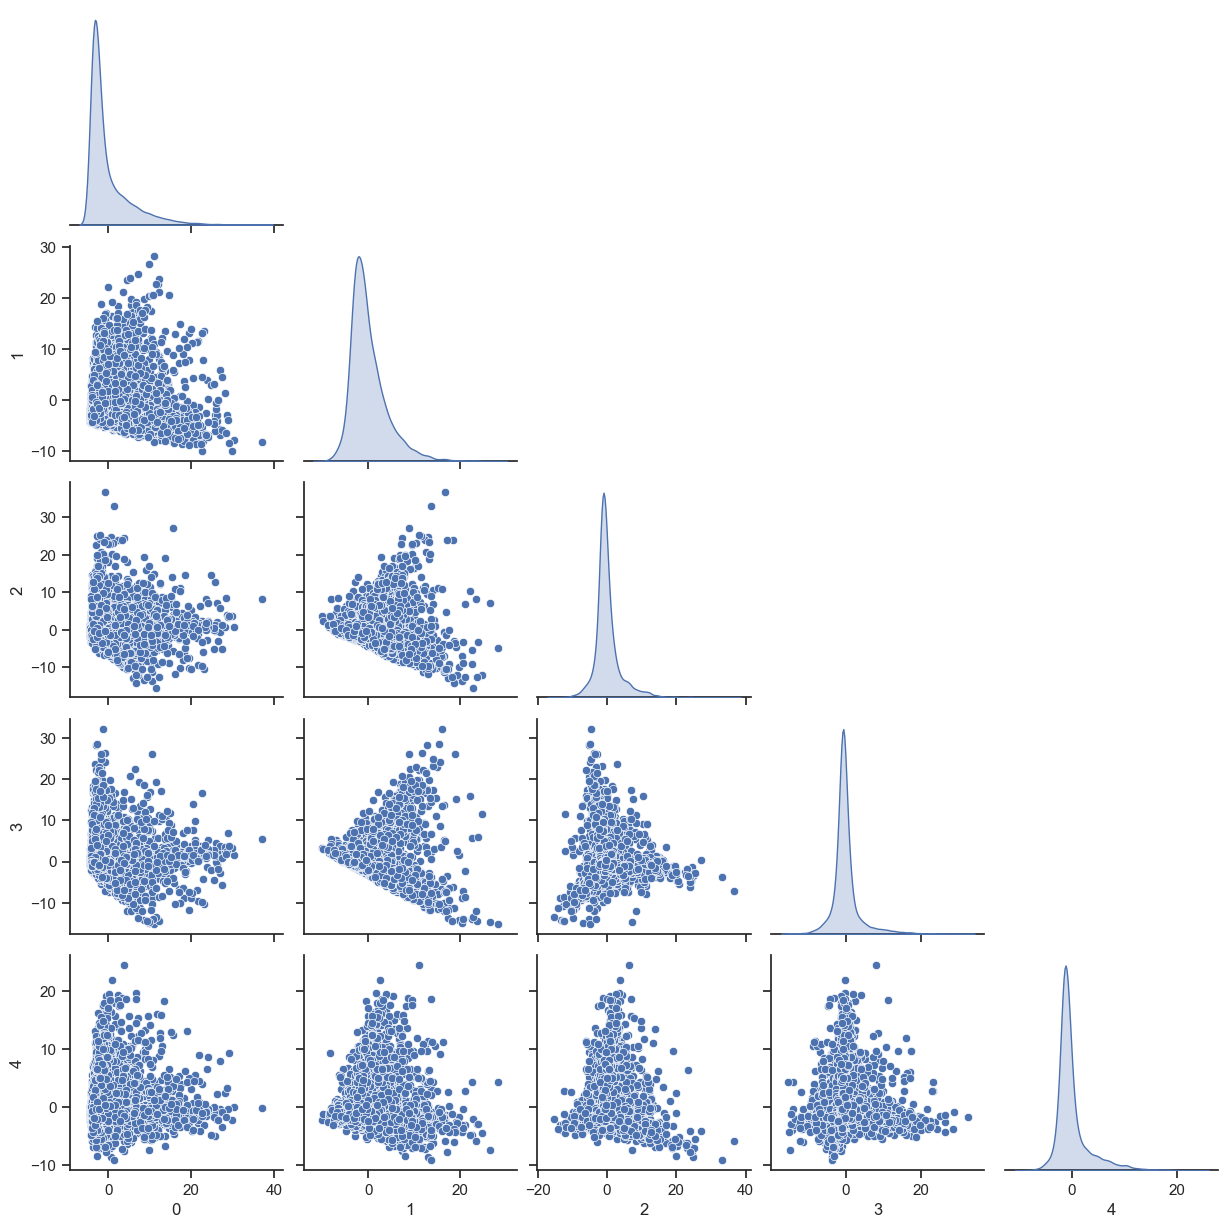

In [124]:
#Trying to find groups through scatter plots if evident clusters are found between principal components 1 to 5

# Create scatter plots between 5 columns
sns.set(style="ticks")
sns.pairplot(PCA_components[[0,1,2,3,4]], diag_kind='kde',corner=True)

# Display the plots
plt.show()

In [125]:
# Could not observe anything significant, lets try to visualize the Principal components through tSNE

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(PCA_components)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7882 samples in 0.008s...
[t-SNE] Computed neighbors for 7882 samples in 0.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7882
[t-SNE] Computed conditional probabilities for sample 2000 / 7882
[t-SNE] Computed conditional probabilities for sample 3000 / 7882
[t-SNE] Computed conditional probabilities for sample 4000 / 7882
[t-SNE] Computed conditional probabilities for sample 5000 / 7882
[t-SNE] Computed conditional probabilities for sample 6000 / 7882
[t-SNE] Computed conditional probabilities for sample 7000 / 7882
[t-SNE] Computed conditional probabilities for sample 7882 / 7882
[t-SNE] Mean sigma: 1.347153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.889671
[t-SNE] KL divergence after 1000 iterations: 1.716479


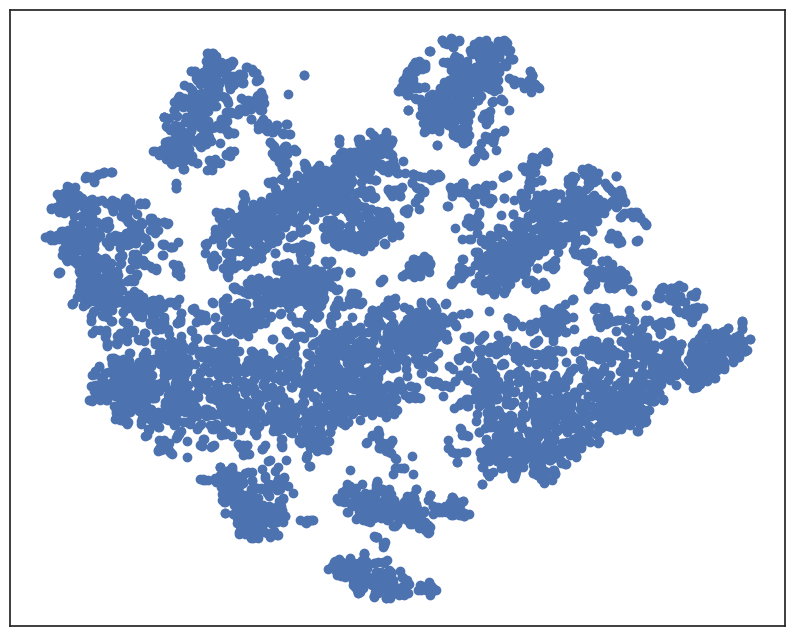

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [162]:
import plotly.express as px
import random
# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the county names to this DataFrame
tsne_df['Topic'] = df['topic'].values

topic_counts = df['topic'].value_counts()


# Get the top 75% topics by count
top_topics = topic_counts.index[:round(len(df['topic'].unique())*0.75)]

# Create a dictionary to map topic to color
color_map = {topic: 'white' if topic not in top_topics else "#{:06x}".format(random.randint(0, 0xFFFFFF)) for topic in tsne_df['Topic'].unique() if topic != 'white'}

# Create an interactive plot and color the points based on the color map
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['Topic'], color='Topic', color_discrete_map=color_map)

# Set the height of the plot to elongate it
fig.update_layout(height=800)

# Show the plot
fig.show()

Alhough we can get the most frequent topics just by value counts, these topics can be far apart in the Dim1-Dim2 plot

Just by the look of the plot, we can make the following observations about the user clusters

By looking at this plot, in the order of size, we can observe big clusters of 
 - Photo Sharing with Shopping and Current events
 - Health Nutrition with personal fitness
 - Cooking
 - College uni and online gaming
 - News, politics and travel

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

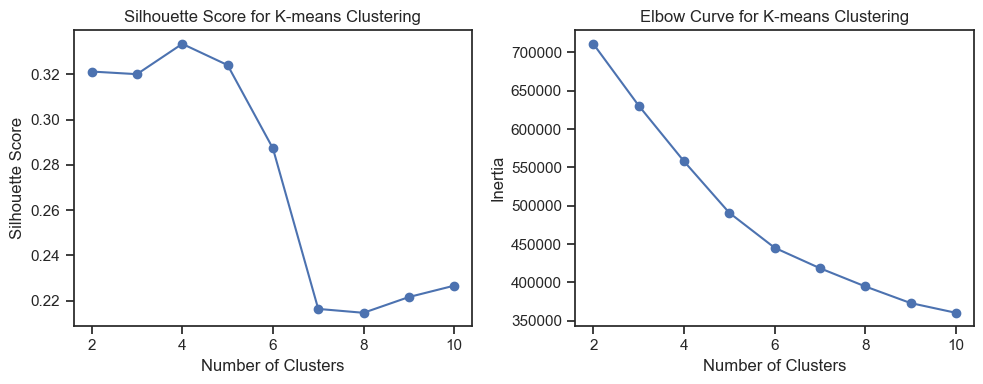

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_values = []

for k in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(PCA_components)
    
    # Calculate silhouette score and inertia for each k
    silhouette_scores.append(silhouette_score(PCA_components, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')

# Plot the elbow curve
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')

plt.tight_layout()
plt.show()

In [131]:
# Based on the above plots, lets try to visualize the clusters based on 4 and 5 clusters respectively

# Perform K-means++ clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(PCA_components)

PCA_components_original= PCA_components.copy()

PCA_components['cluster'] = cluster_labels

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [133]:
#Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

#We do not need our user column and our topic column that we previously created
concatenated_df.drop(columns=['user','topic'], axis=1, inplace=True)

concatenated_df.head()

current_events  travel  photo_sharing  tv_film  sports_fandom  politics  \
0               0       2              2        1              1         0   
1               3       2              1        1              4         1   
2               3       4              3        5              0         2   
3               5       2              2        1              0         1   
4               2       0              6        0              0         2   

   food  family  home_and_garden  music  ...  beauty  parenting  dating  \
0     4       1                2      0  ...       0          1       1   
1     2       2                1      0  ...       0          0       1   
2     1       1                1      1  ...       1          0       1   
3     0       1                0      0  ...       1          0       0   
4     0       1                0      0  ...       0          0       0   

   school  personal_fitness  fashion  small_business  spam  adult  cluster  
0       0                11        0               0     0      0        2  
1       4                 0        0               0     0      0        1  
2       0                 0        1               0     0      0        1  
3       0                 0        0               0     0      0        1  
4       0                 0        0               1     0      0        1  

[5 rows x 35 columns]

In [134]:
cluster_analysis = concatenated_df.groupby('cluster').mean()  # Calculate mean values for each cluster
cluster_analysis.head()

current_events    travel  photo_sharing   tv_film  sports_fandom  \
cluster                                                                     
0              1.463801  1.633484       2.739819  1.416290       1.633484   
1              1.498515  1.583610       2.357680  1.050149       1.605976   
2              1.573464  1.495102       2.623330  1.055209       1.535174   
3              1.750842  1.732323       6.070707  1.035354       1.560606   

         politics      food    family  home_and_garden     music  ...  \
cluster                                                           ...   
0        1.545249  1.468326  1.135747         0.561086  0.798643  ...   
1        1.861436  1.236240  0.818277         0.487507  0.604753  ...   
2        1.581478  2.238646  0.925200         0.624221  0.739092  ...   
3        1.659933  1.308081  0.984848         0.614478  1.195286  ...   

         religion    beauty  parenting    dating    school  personal_fitness  \
cluster                                                                        
0        1.040724  0.533937   0.972851  0.739819  0.676471          1.018100   
1        1.076359  0.445046   0.882404  0.642146  0.744714          0.649485   
2        1.109528  0.533393   1.007124  1.063224  0.768477          5.869991   
3        1.292929  3.663300   1.095960  0.685185  1.055556          1.287879   

          fashion  small_business      spam     adult  
cluster                                                
0        0.927602        0.434389  0.009050  0.459276  
1        0.575922        0.322034  0.006640  0.416914  
2        0.820125        0.290294  0.006233  0.311665  
3        5.434343        0.488215  0.003367  0.404040  

[4 rows x 34 columns]

In [135]:
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 3 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()  # Corrected index range

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values':top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values- {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 3 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values- [10.529411764705882, 10.072398190045249, 2.739819004524887, 2.432126696832579], Cluster Size: 442
Cluster 1: Top 3 Topics - photo_sharing, politics, sports_fandom, travel, Corresponding mean values- [2.357679538703477, 1.8614363096278175, 1.6059758867726717, 1.583609994757994], Cluster Size: 5723
Cluster 2: Top 3 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values- [11.743544078361532, 5.869991095280499, 3.210151380231523, 2.6233303650934996], Cluster Size: 1123
Cluster 3: Top 3 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values- [11.303030303030303, 6.070707070707071, 5.434343434343434, 3.6632996632996635], Cluster Size: 594


This cluster analysis revealed distinct topic preferences and strengths within different clusters.

Cluster 0: Centered on "college_uni" and "online_gaming," with a focus on "photo_sharing" and "sports_playing," reflecting an interest in education, gaming, and sports.

Cluster 1: Emphasizes "photo_sharing" and "politics," while also showing interest in "sports_fandom" and "travel," suggesting engagement in current affairs, sports, and travel.
`
Cluster 2: Primarily revolves around "health_nutrition" and "personal_fitness," accompanied by interest in "cooking" and "photo_sharing," signifying health-conscious behaviors and culinary interests.

Cluster 3: Showcases a blend of "cooking," "photo_sharing," "fashion," and "beauty," revealing an affinity for cooking, fashion trends, and beauty-related content.

In [155]:
# Perform K-means++ clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

PCA_components = PCA_components_original.copy()
cluster_labels = kmeans.fit_predict(PCA_components)



PCA_components['cluster'] = cluster_labels

#Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

#We do not need our user column and our topic column that we previously created
concatenated_df.drop(columns=['user','topic'], axis=1, inplace=True)

cluster_analysis = concatenated_df.groupby('cluster').mean()  # Calculate mean values for each cluster

cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 3 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()  # Corrected index range

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values':top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values- {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values- [11.460456942003514, 6.054481546572935, 5.506151142355009, 3.727592267135325], Cluster Size: 569
Cluster 1: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values- [11.881970260223047, 5.952602230483271, 3.2481412639405205, 2.637546468401487], Cluster Size: 1076
Cluster 2: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values- [10.626168224299066, 10.179906542056075, 2.7406542056074765, 2.439252336448598], Cluster Size: 428
Cluster 3: Top 4 Topics - photo_sharing, sports_fandom, current_events, shopping, Corresponding mean values- [2.3639749117992945, 1.5147001176009407, 1.4803998431987455, 1.3388867110936888], Cluster Size: 5102
Cluster 4: Top 4 Topics - politics, travel, news, photo_sharing, Corresponding mean values- [9.142857142857142, 5.678925035360679, 5.141442715700141, 2.45968882602546], Cluster

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



This cluster analysis provides insights into diverse topic preferences and strengths within distinct clusters.

Cluster 0: Focused on "cooking," "photo_sharing," "fashion," and "beauty," showcasing a combination of interests in culinary arts and style.

Cluster 1: Highlights "health_nutrition" and "personal_fitness," coupled with "cooking" and "photo_sharing," indicating a health-conscious segment with culinary inclinations.

Cluster 2: Centers on "college_uni" and "online_gaming," accompanied by "photo_sharing" and "sports_playing," representing an audience engaged in education, gaming, and sports.

Cluster 3: Emphasizes "photo_sharing," "sports_fandom," "current_events," and "shopping," suggesting an interest in photography, sports, current affairs, and shopping.

Cluster 4: Showcases "politics," "travel," "news," and "photo_sharing," portraying an engaged group interested in politics, travel, and current events.

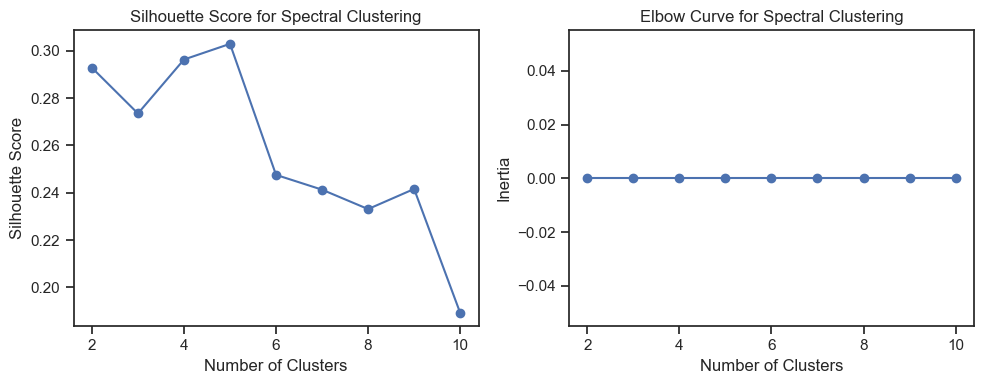

In [148]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

PCA_components = PCA_components_original.copy()

silhouette_scores = []
inertia_values = []

for k in range(2, 11):  # Start from 2 clusters as silhouette score requires at least 2 clusters
    spectral_clustering = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')
    labels = spectral_clustering.fit_predict(PCA_components)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(PCA_components, labels))
    
    # Inertia is not applicable for spectral clustering, but you can use a placeholder value
    inertia_values.append(0.0)

# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Spectral Clustering')

# Plot the elbow curve (use placeholder values)
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Spectral Clustering')

plt.tight_layout()
plt.show()

In [ ]:
# From this Silhoutte plot we will try the optimal number of clusters as 4 and 5

In [156]:
from sklearn.cluster import SpectralClustering


# Specify the number of clusters for spectral clustering
n_clusters = 4

# Initialize SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')

# Perform spectral clustering and get cluster labels
cluster_labels = spectral_clustering.fit_predict(PCA_components_original)

# Copy PCA_components_original to avoid modifying the original data
PCA_components = PCA_components_original.copy()

# Add cluster labels to PCA_components DataFrame
PCA_components['cluster'] = cluster_labels

# Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

# Drop unnecessary columns
concatenated_df.drop(columns=['user', 'topic'], axis=1, inplace=True)

# Calculate mean values for each cluster
cluster_analysis = concatenated_df.groupby('cluster').mean()

# Create a dictionary to store cluster information
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 4 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values': top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values - {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values - [10.283185840707965, 10.008849557522124, 2.732300884955752, 2.3871681415929205], Cluster Size: 452
Cluster 1: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values - [10.589051094890511, 5.32043795620438, 3.77007299270073, 2.745255474452555], Cluster Size: 1370
Cluster 2: Top 4 Topics - photo_sharing, sports_fandom, cooking, current_events, Corresponding mean values - [2.7075488613950154, 1.660749506903353, 1.6361843284920208, 1.5239376008606778], Cluster Size: 5577
Cluster 3: Top 4 Topics - politics, travel, news, computers, Corresponding mean values - [10.612836438923395, 7.399585921325052, 4.6645962732919255, 3.0973084886128364], Cluster Size: 483


This cluster analysis uncovers significant topic preferences within distinct clusters.

Cluster 0: Focused on "college_uni," "online_gaming," "photo_sharing," and "sports_playing," indicating an audience engaged in education, gaming, and sports-related activities.

Cluster 1: Highlights "health_nutrition," "personal_fitness," "cooking," and "photo_sharing," suggesting a health-conscious segment with culinary interests.

Cluster 2: Centers around "photo_sharing," "sports_fandom," "cooking," and "current_events," depicting an audience enthusiastic about photography, sports, and current affairs.

Cluster 3: Emphasizes "politics," "travel," "news," and "computers," revealing a tech-savvy group interested in politics, travel, and technology.

In [157]:
from sklearn.cluster import SpectralClustering


# Specify the number of clusters for spectral clustering
n_clusters = 5

# Initialize SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')

# Perform spectral clustering and get cluster labels
cluster_labels = spectral_clustering.fit_predict(PCA_components_original)

# Copy PCA_components_original to avoid modifying the original data
PCA_components = PCA_components_original.copy()

# Add cluster labels to PCA_components DataFrame
PCA_components['cluster'] = cluster_labels

# Merge the original dataframe with cluster information to analyze the clusters
concatenated_df = pd.concat([df, PCA_components[['cluster']]], axis=1)

# Drop unnecessary columns
concatenated_df.drop(columns=['user', 'topic'], axis=1, inplace=True)

# Calculate mean values for each cluster
cluster_analysis = concatenated_df.groupby('cluster').mean()

# Create a dictionary to store cluster information
cluster_info_dict = {}

# Iterate over each cluster
for cluster in cluster_analysis.index:
    # Sort the topics within the cluster based on their mean values
    sorted_topics = cluster_analysis.loc[cluster].sort_values(ascending=False)
    
    # Extract the top 4 topics (excluding 'cluster' column)
    top_topics = sorted_topics.index[0:4].tolist()

    # Extract corresponding mean values for those topics
    top_values = sorted_topics.values[0:4].tolist()
    
    # Calculate the cluster size (number of data points in the cluster)
    cluster_size = len(concatenated_df[concatenated_df['cluster'] == cluster])
    
    # Store the top topics and cluster size in the dictionary
    cluster_info_dict[cluster] = {'top_topics': top_topics, 'cluster_size': cluster_size, 'top_values': top_values}

# Display the top topics and cluster sizes for each cluster
for cluster, info in cluster_info_dict.items():
    top_topics = ', '.join(info['top_topics'])
    top_values = info['top_values']
    cluster_size = info['cluster_size']
    print(f"Cluster {cluster}: Top 4 Topics - {top_topics}, Corresponding mean values - {top_values}, Cluster Size: {cluster_size}")

Cluster 0: Top 4 Topics - health_nutrition, personal_fitness, cooking, photo_sharing, Corresponding mean values - [10.797079169869331, 5.41967717140661, 3.050730207532667, 2.46272098385857], Cluster Size: 1301
Cluster 1: Top 4 Topics - photo_sharing, sports_fandom, current_events, shopping, Corresponding mean values - [2.4528076463560335, 1.6885702907208284, 1.5145360414177618, 1.3908801274392673], Cluster Size: 5022
Cluster 2: Top 4 Topics - college_uni, online_gaming, photo_sharing, sports_playing, Corresponding mean values - [10.197752808988763, 10.004494382022472, 2.6449438202247193, 2.3797752808988766], Cluster Size: 445
Cluster 3: Top 4 Topics - politics, travel, news, computers, Corresponding mean values - [10.424849699398798, 7.152304609218437, 4.69939879759519, 2.9779559118236474], Cluster Size: 499
Cluster 4: Top 4 Topics - cooking, photo_sharing, fashion, beauty, Corresponding mean values - [10.930081300813008, 5.588617886178862, 5.240650406504065, 3.5658536585365854], Clust

Cluster 0: Centered on "health_nutrition," "personal_fitness," "cooking," and "photo_sharing," this group exhibits a health-conscious focus with culinary and wellness interests.

Cluster 1: Emphasizes "photo_sharing," "sports_fandom," "current_events," and "shopping," indicating an engagement with photography, sports, current affairs, and shopping.

Cluster 2: Highlights "college_uni," "online_gaming," "photo_sharing," and "sports_playing," suggesting an audience interested in education, online gaming, and sports-related content.

Cluster 3: Focused on "politics," "travel," "news," and "computers," this cluster indicates an engagement with political news, travel content, and technology.

Cluster 4: Revolves around "cooking," "photo_sharing," "fashion," and "beauty," portraying interests in culinary arts, photography, fashion, and beauty.

# Image classification with neural networks

In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

  1. Overall test-set accuracy, measured however you think is appropriate
  2. Show some of the example images from the test set, together with your model's predicted classes.
  3. A confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).

I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

In [86]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to a consistent size
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

In [ ]:
df = torchvision.datasets.ImageFolder(root=r".\EuroSAT_RGB", transform=transform)

In [ ]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size
train_df, test_df = torch.utils.data.random_split(df, [train_size, test_size])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_df, batch_size=64, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_df, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(12544, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1) #Apply softmax activation for classification

net = CNN()
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=12544, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
num_epochs=10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')
print('Training finished')

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Loss: 1.4120, Accuracy: 48.67%
Epoch 2, Loss: 1.0207, Accuracy: 63.77%
Epoch 3, Loss: 0.8997, Accuracy: 68.94%
Epoch 4, Loss: 0.8164, Accuracy: 71.54%
Epoch 5, Loss: 0.7690, Accuracy: 73.22%
Epoch 6, Loss: 0.7331, Accuracy: 75.11%
Epoch 7, Loss: 0.7039, Accuracy: 76.40%
Epoch 8, Loss: 0.6597, Accuracy: 77.61%
Epoch 9, Loss: 0.6387, Accuracy: 78.35%
Epoch 10, Loss: 0.6071, Accuracy: 79.13%
Training finished


Testing

In [ ]:
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Overall Test-Set Accuracy: {test_accuracy:.2f}%')

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Overall Test-Set Accuracy: 83.56%


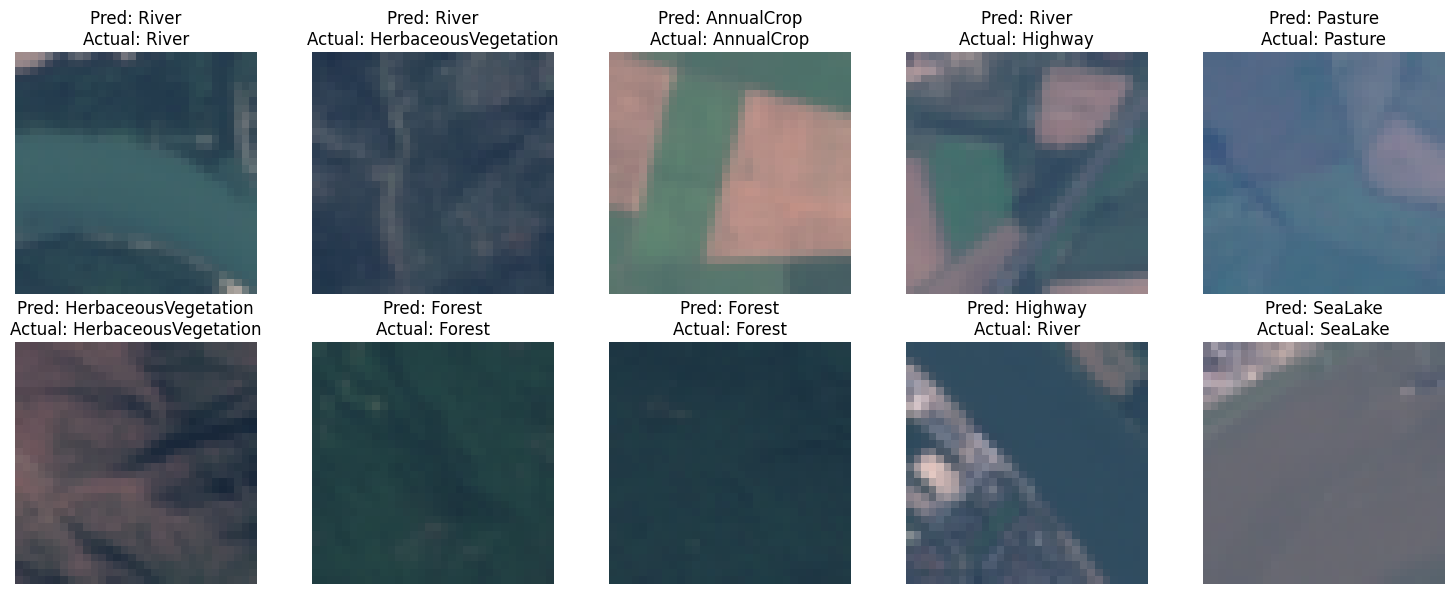

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
net.eval()

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Shuffle the images within the batch
shuffled_indices = np.random.permutation(len(images))
shuffled_images = images[shuffled_indices]
shuffled_labels = labels[shuffled_indices]

outputs = net(shuffled_images)
_, predicted = torch.max(outputs, 1)

# Define classes for labeling
classes = df.classes

# Display a specified number of example images and their predicted classes in multiple rows
num_rows = 2        # Number of rows
images_per_row = 5  # Number of examples per row
total_examples = num_rows * images_per_row

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 6))

for row in range(num_rows):
    for col in range(images_per_row):
        idx = row * images_per_row + col
        if idx < len(shuffled_images):
            image = shuffled_images[idx].cpu().numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            image = std * image + mean
            image = np.clip(image, 0, 1)

            ax = axes[row, col]
            ax.imshow(image)
            ax.set_title(f'Pred: {classes[predicted[idx]]}\nActual: {classes[shuffled_labels[idx]]}')
            ax.axis('off')

plt.tight_layout()
plt.show()

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


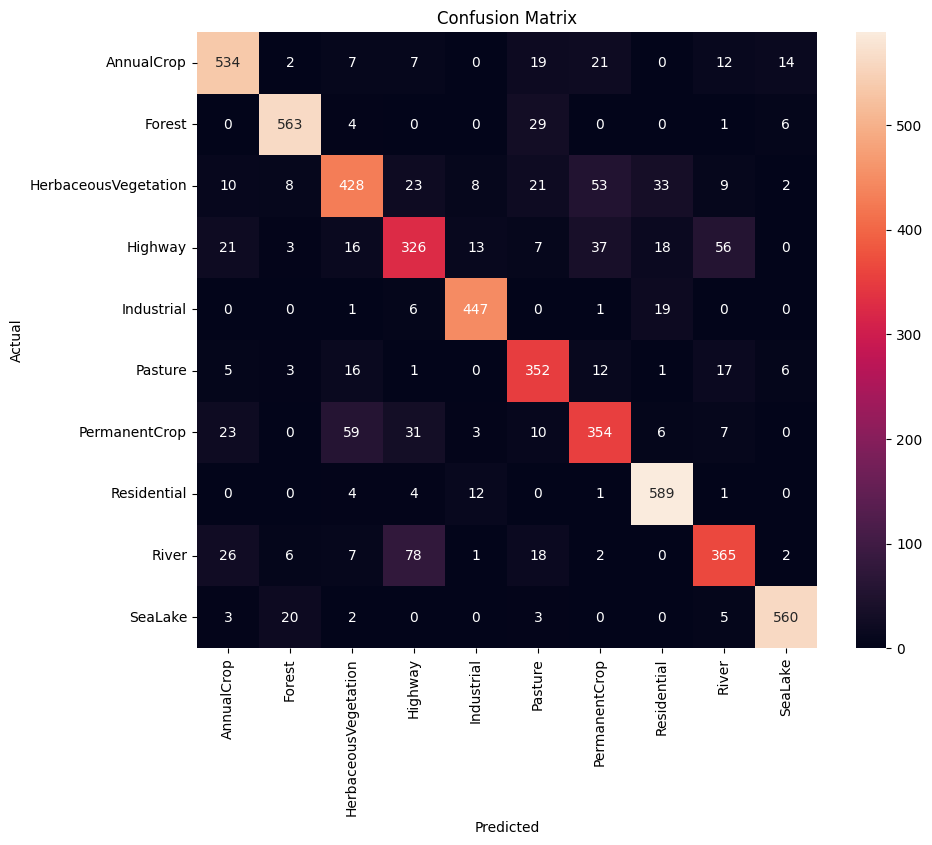

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the model to evaluation mode
net.eval()

conf_matrix = torch.zeros(len(classes), len(classes))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        for i in range(len(labels)):
            conf_matrix[labels[i]][predicted[i]] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix.numpy(), annot=True, fmt="g", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()